<a href="https://colab.research.google.com/github/obaidah3/Mammo-Ml/blob/main/DS_Projrect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Introduction

Breast cancer is one of the most common and life-threatening diseases affecting women worldwide. Early diagnosis plays a crucial role in increasing survival rates, reducing treatment complexity, and improving patient outcomes. Traditional diagnostic procedures, such as mammography and clinical examination, can be time-consuming and prone to human error.

Machine learning provides powerful tools for early breast cancer detection by automatically identifying malignant and benign tumors based on medical measurements. In this project, we aim to analyze the Breast Cancer Wisconsin Diagnostic (WBCD) dataset using different statistical techniques and machine learning models. We explore data characteristics, identify relevant features, apply dimensionality reduction methods, and evaluate several classifiers to determine the most effective model for early tumor detection.

This project focuses on understanding the mathematical foundations of data analysis—such as correlation, covariance, hypothesis testing, PCA, and LDA—while applying them in a real medical classification task.

#Dataset Description

The dataset used in this project is the Breast Cancer Wisconsin Diagnostic (WBCD) dataset, commonly used for binary classification tasks in medical machine learning. The dataset contains:

569 rows (patients)

30 numerical features extracted from digital breast mass images

1 target variable:

0 → Malignant (cancerous)

1 → Benign (non-cancerous)

Each feature represents a statistical property of the cell nuclei present in a digitized image, such as:

Radius

Texture

Perimeter

Area

Smoothness

Compactness

Concavity

Symmetry

Fractal dimension

All features are continuous (float64) and standardized measurements suitable for statistical analysis and machine learning algorithms.

The class distribution is:

212 malignant

357 benign

This indicates a mild imbalance, but it does not require resampling methods.

The dataset is structured, clean, and widely used for medical research, making it ideal for evaluating machine learning models.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

#Append the target vector to the DataFrame as the classification label.
df['target'] = data.target  # 0 = malignant, 1 = benign

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape


(569, 31)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


data is Realistic + Balanced

#Full Dataset Description
Breast Cancer Wisconsin Diagnostic Dataset (WBCD) Number of Rows: 569 Number of Features: 30 Task Type: Binary Classification Target Values: 0 = Malignant 1 = Benign All data is of type float64 → Excellent for statistical analysis and ML.

In [ ]:
#Shows class distribution Balanced datasets lead to stable model performance without requiring resampling techniques.
df['target'].value_counts()


,count
target,
1,357
0,212


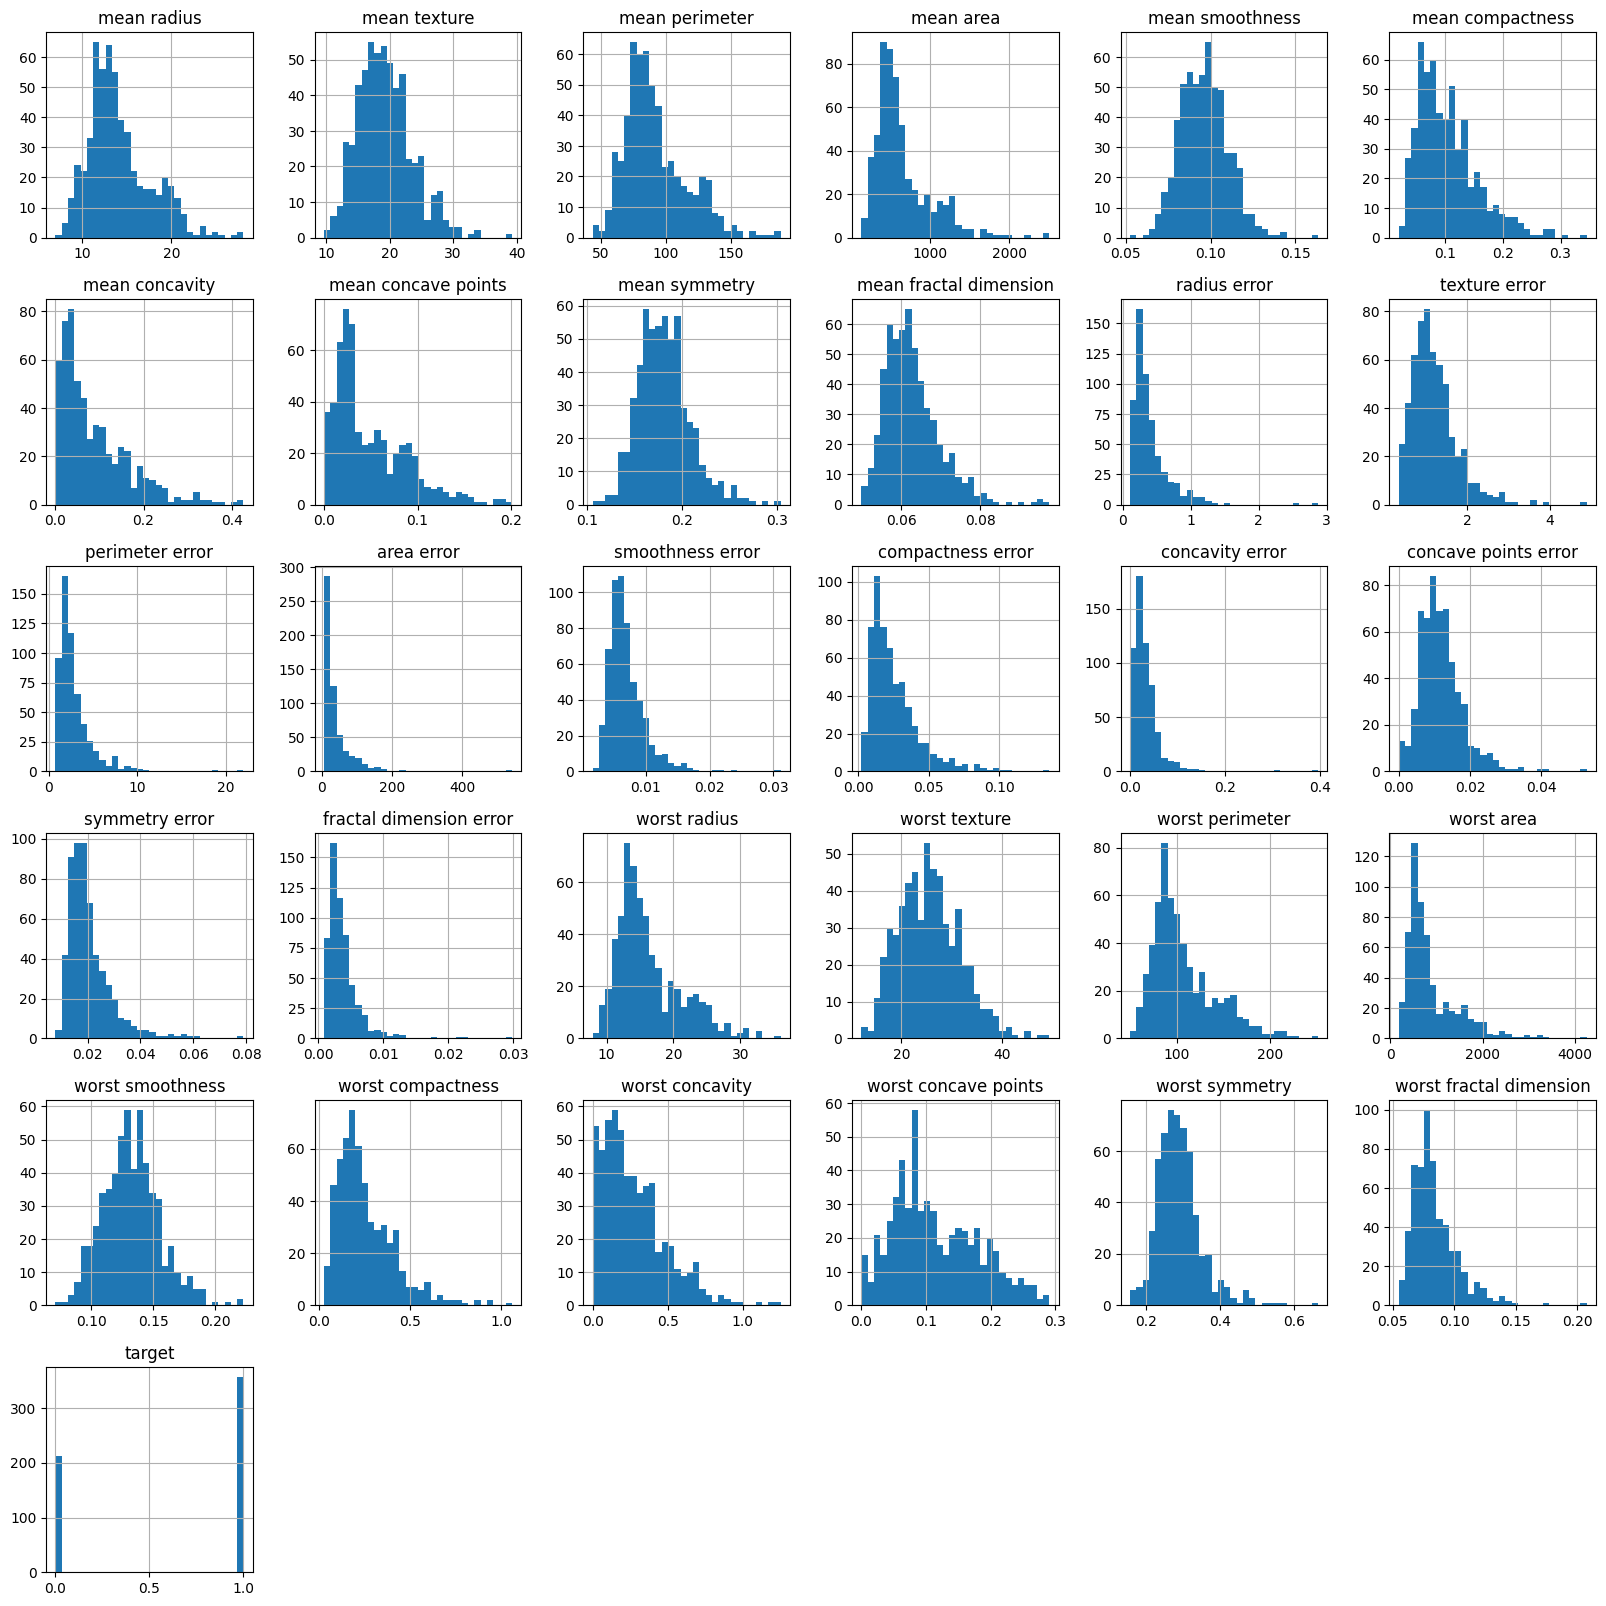

In [ ]:
#Visualization: Histograms for each feature
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(20,20))
plt.show()


Histograms provide a quick overview of the distribution of each feature, helping us prepare for statistical tests, scaling, and dimensionality reduction.

# *Preprocessing Stage*

In [ ]:
#check messings
df.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


“No missing values were detected in the dataset, ensuring reliability in statistical tests and avoiding the need for imputation techniques.”

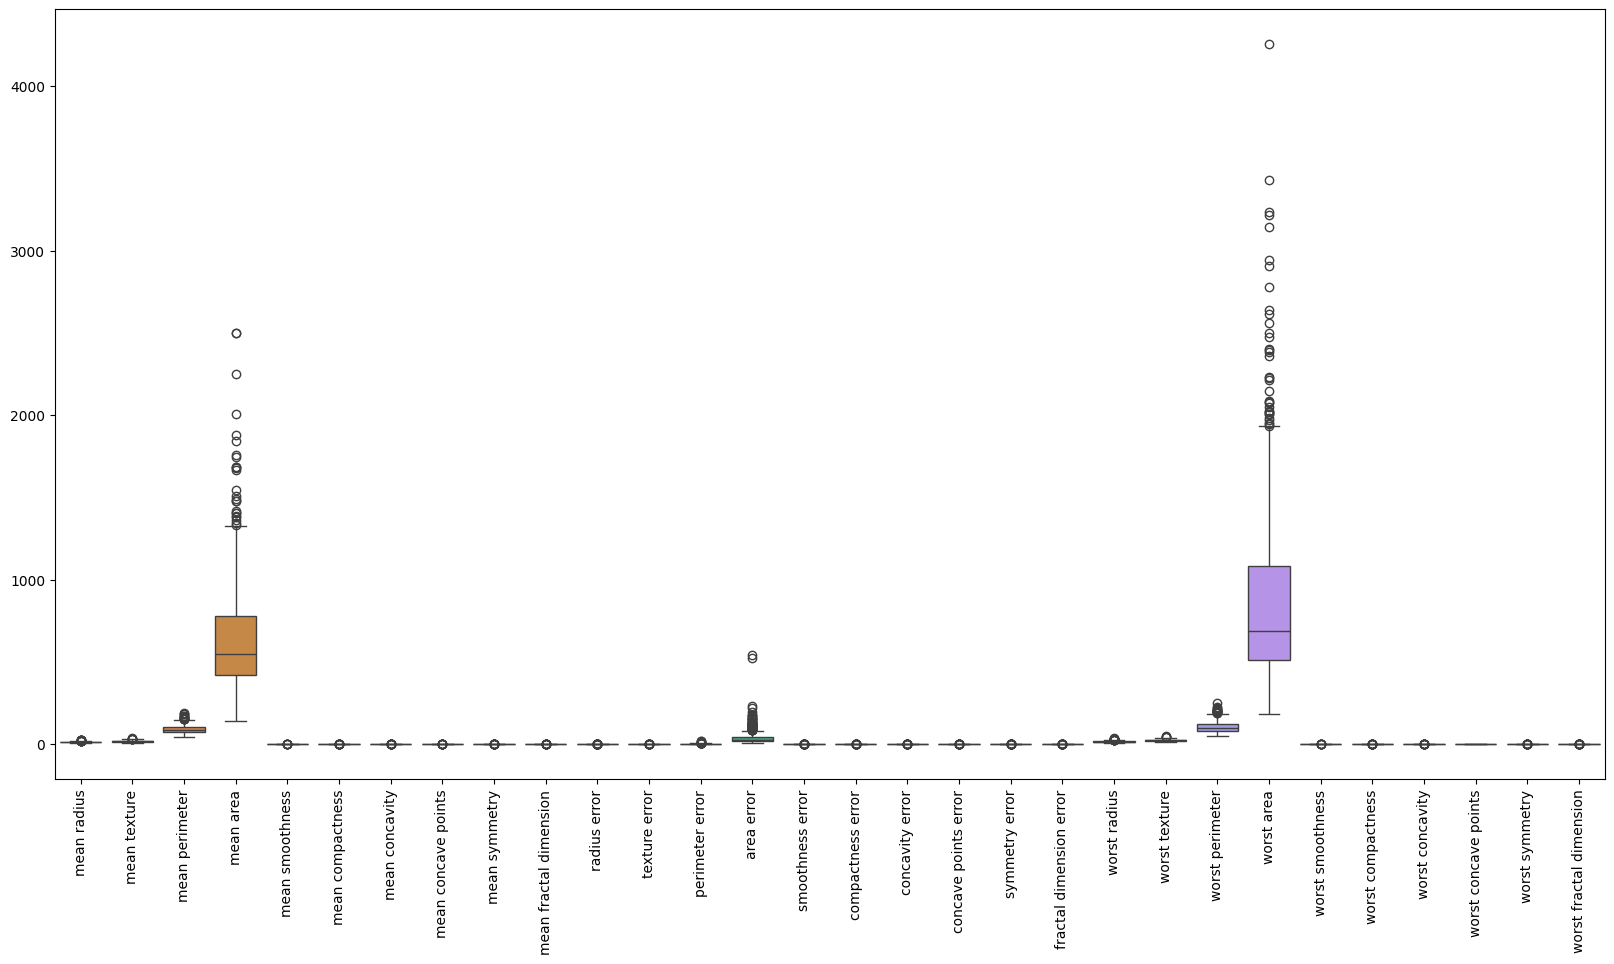

In [ ]:
#outliers
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(data=df.drop('target', axis=1))
plt.xticks(rotation=90)
plt.show()


Outliers exist in several numerical features (e.g., area, perimeter, concavity error).
Since medical features can contain meaningful extreme values, outliers were not removed to avoid losing important clinical information.

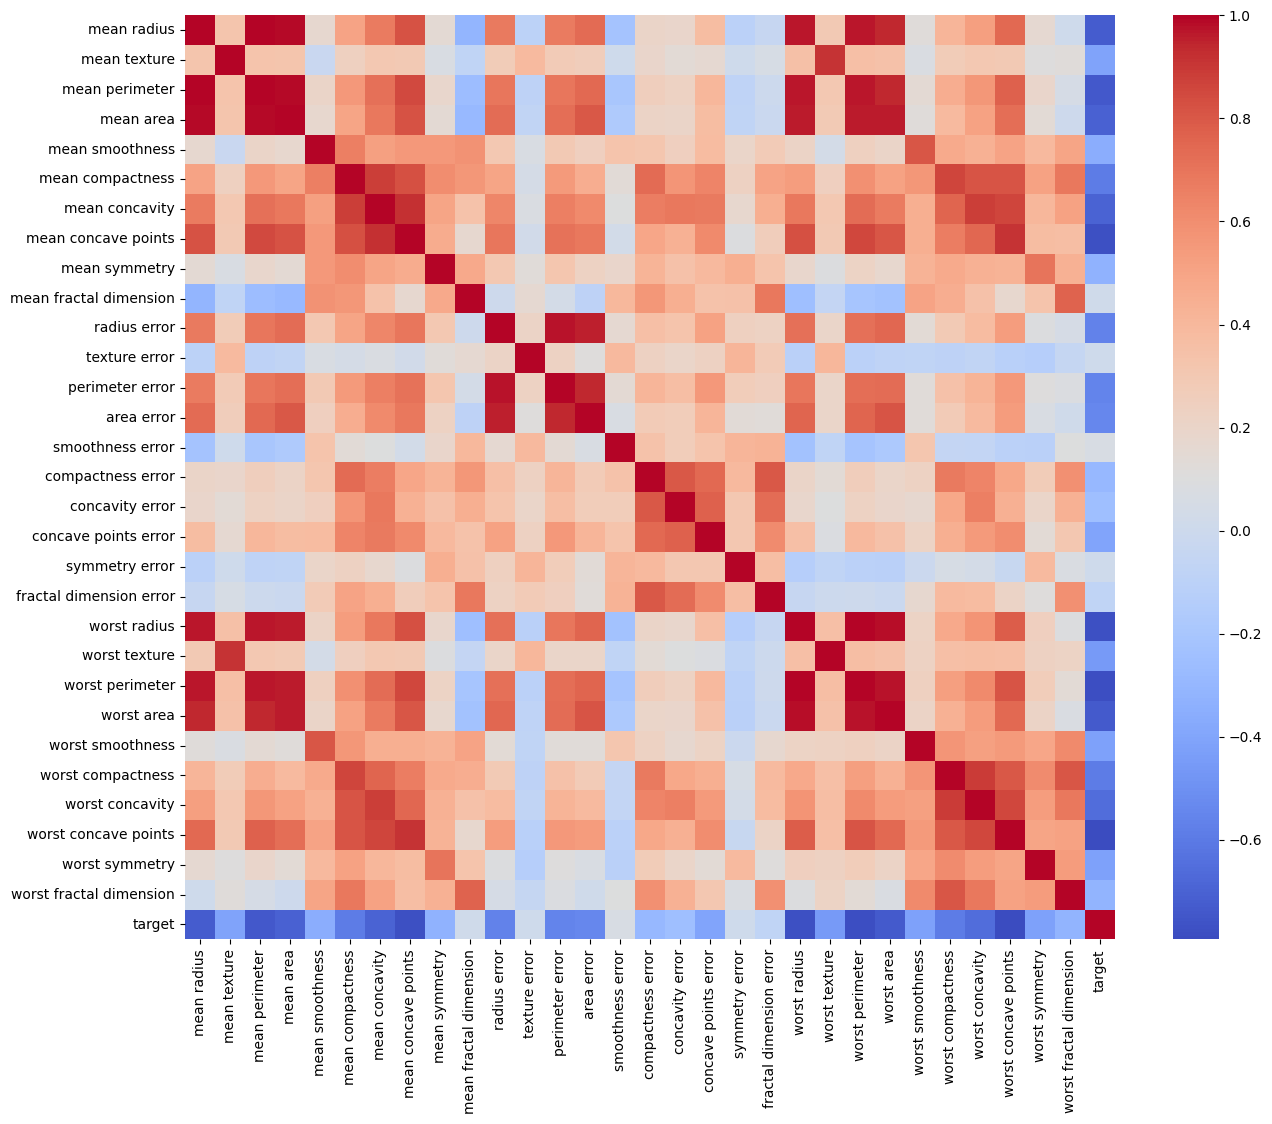

In [ ]:
# Correlation Matrix + Heatmap --> for feature sellection , Features redundant
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()


Strong correlations exist between:

mean radius, mean perimeter, mean area

worst radius, worst perimeter, worst area
These correlations motivate using PCA later for dimensionality reduction.

مهم جدًا لمرحلة PCA → لأن PCA بتشيل ال redundancy.

مهم جدًا لـ LDA → لأنها بتفترض إن الـ features مش highly correlated.

مهم لـ Decision Tree → عشان نعرف مين أقوى Feature.

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("target", axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["target"] = df["target"]
##Scale all features except target

“Standardization was required because PCA, LDA, and KNN are distance-based or variance-based algorithms. Scaling ensures that all features contribute equally.”

In [ ]:

from scipy import stats


print("DATA ANALYSIS - BASIC STATISTICS")

# Basic Statistics
print("\n1. Mean:")
print(df.drop('target', axis=1).mean())

print("\n2. Variance:")
print(df.drop('target', axis=1).var())

print("\n3. Standard Deviation:")
print(df.drop('target', axis=1).std())

print("\n4. Skewness:")
skewness = df.drop('target', axis=1).skew()
print(skewness)

print("\n5. Kurtosis:")
kurtosis = df.drop('target', axis=1).kurtosis()
print(kurtosis)

# Interpretation
print("INTERPRETATION:")
print("Skewness Analysis:")
print(f"  - Highly skewed features (|skew| > 1): {list(skewness[abs(skewness) > 1].index)}")
print(f"  - Number of right-skewed features (skew > 0): {sum(skewness > 0)}")
print(f"  - Number of left-skewed features (skew < 0): {sum(skewness < 0)}")

print("\nKurtosis Analysis:")
print(f"  - Heavy-tailed features (kurtosis > 3): {list(kurtosis[kurtosis > 3].index)}")
print(f"  - Light-tailed features (kurtosis < 3): {list(kurtosis[kurtosis < 3].index)}")

DATA ANALYSIS - BASIC STATISTICS

1. Mean:
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst c


Covariance Matrix (Sample - First 5 features):
                 mean radius  mean texture  mean perimeter      mean area  \
mean radius        12.418920      4.907582       85.447142    1224.483409   
mean texture        4.907582     18.498909       34.439759     485.993787   
mean perimeter     85.447142     34.439759      590.440480    8435.772345   
mean area        1224.483409    485.993787     8435.772345  123843.554318   
mean smoothness     0.008454     -0.001415        0.070836       0.876178   

                 mean smoothness  
mean radius             0.008454  
mean texture           -0.001415  
mean perimeter          0.070836  
mean area               0.876178  
mean smoothness         0.000198  

✓ Covariance matrix heatmap saved as 'covariance_matrix.png'


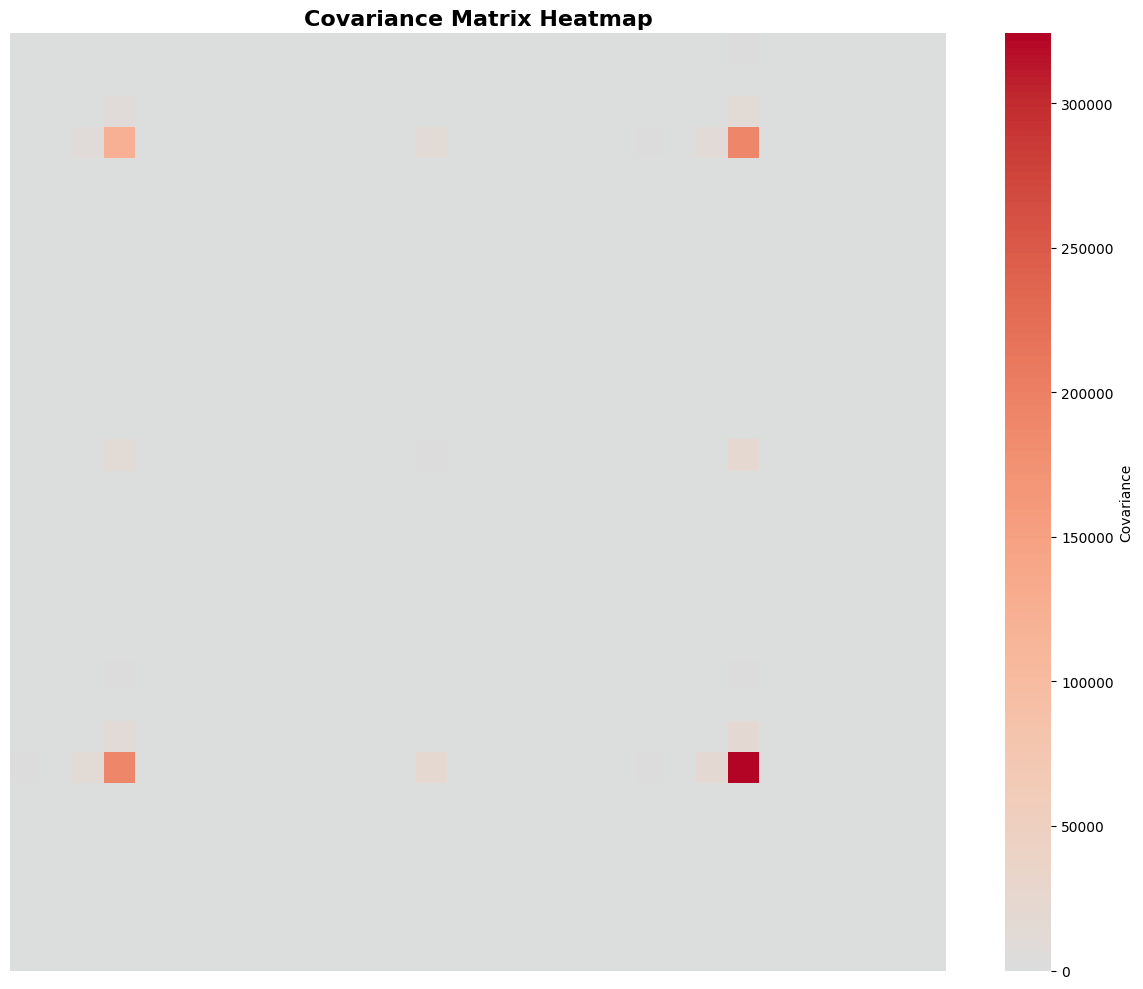

In [ ]:
# COVARIANCE MATRIX
# Calculate covariance matrix
cov_matrix = df.drop('target', axis=1).cov()

# Display sample (first 5x5)
print("\nCovariance Matrix (Sample - First 5 features):")
print(cov_matrix.iloc[:5, :5])

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap='coolwarm', center=0,
            xticklabels=False, yticklabels=False,
            cbar_kws={'label': 'Covariance'})
plt.title('Covariance Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('covariance_matrix.png', dpi=150)
print("\n✓ Covariance matrix heatmap saved as 'covariance_matrix.png'")
plt.show()



##Interpretation:
 • High covariance between radius-perimeter-area features

 • This explains the high correlation seen earlier

 • Justifies the use of PCA for dimensionality reduction

In [ ]:
# T-TEST (Sample on Top 5 Most Important Features)
from scipy.stats import ttest_ind

# Select top 5 features based on correlation with target
correlation_with_target = df.corr()['target'].abs().sort_values(ascending=False)
top_5_features = correlation_with_target[1:6].index.tolist()  # Exclude 'target' itself

print(f"\nTesting Top 5 Features: {top_5_features}\n")

# Separate classes
malignant = df[df['target'] == 0]
benign = df[df['target'] == 1]

t_test_results = []
for feature in top_5_features:
    t_stat, p_value = ttest_ind(malignant[feature], benign[feature])
    t_test_results.append({
        'Feature': feature,
        'T-Statistic': f"{t_stat:.4f}",
        'P-Value': f"{p_value:.2e}",
        'Significant': ' Yes' if p_value < 0.05 else ' No'
    })

t_test_df = pd.DataFrame(t_test_results)
print(t_test_df.to_string(index=False))


Testing Top 5 Features: ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter']

             Feature T-Statistic   P-Value Significant
worst concave points     31.0546 1.97e-124         Yes
     worst perimeter     29.9657 5.77e-119         Yes
 mean concave points     29.3543 7.10e-116         Yes
        worst radius     29.3391 8.48e-116         Yes
      mean perimeter     26.4052 8.44e-101         Yes


##Interpretation:
  • Reject null hypothesis: Means are significantly different

  • Strong evidence for class separability



In [ ]:
# ANOVA TEST (Alternative to T-test)
from scipy.stats import f_oneway
anova_results = []
for feature in top_5_features:
    f_stat, p_value = f_oneway(malignant[feature], benign[feature])
    anova_results.append({
        'Feature': feature,
        'F-Statistic': f"{f_stat:.4f}",
        'P-Value': f"{p_value:.2e}",
        'Significant': ' Yes' if p_value < 0.05 else ' No'
    })

anova_df = pd.DataFrame(anova_results)
print(anova_df.to_string(index=False))

             Feature F-Statistic   P-Value Significant
worst concave points    964.3854 1.97e-124         Yes
     worst perimeter    897.9442 5.77e-119         Yes
 mean concave points    861.6760 7.10e-116         Yes
        worst radius    860.7817 8.48e-116         Yes
      mean perimeter    697.2353 8.44e-101         Yes


##Interpretation:
• ANOVA confirms T-test results

• High F-statistics indicate strong between-group variance

• All features pass significance test (α = 0.05)

In [ ]:
# CHI-SQUARE TEST (After Binning)
from scipy.stats import chi2_contingency # Added this import

# Select 3 features for binning
features_to_bin = ['mean radius', 'mean concave points', 'worst perimeter']

chi_results = []
contingency_tables = {}

for feature in features_to_bin:
    # Create bins (Low, Medium, High)
    df[f'{feature}_binned'] = pd.cut(df[feature], bins=3, labels=['Low', 'Medium', 'High'])

    # Contingency table
    contingency = pd.crosstab(df[f'{feature}_binned'], df['target'])
    contingency_tables[feature] = contingency

    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)

    chi_results.append({
        'Feature': feature,
        'Chi-Square': f"{chi2:.4f}",
        'P-Value': f"{p_value:.2e}",
        'DOF': dof,
        'Significant': '✓ Yes' if p_value < 0.05 else '✘ No'
    })

chi_df = pd.DataFrame(chi_results)
print("\nChi-Square Test Results:")
print(chi_df.to_string(index=False))

# Show one contingency table as example
print(f"Example Contingency Table: {features_to_bin[0]}")
print(contingency_tables[features_to_bin[0]])
print("\nColumns: 0 = Malignant, 1 = Benign")

# Clean up temporary columns
for feature in features_to_bin:
    df.drop(f'{feature}_binned', axis=1, inplace=True)


Chi-Square Test Results:
            Feature Chi-Square  P-Value  DOF Significant
        mean radius   280.1397 1.47e-61    2       ✓ Yes
mean concave points   309.1756 7.30e-68    2       ✓ Yes
    worst perimeter   383.0093 6.77e-84    2       ✓ Yes
Example Contingency Table: mean radius
target                0    1
mean radius_binned          
Low                  32  306
Medium              158   51
High                 22    0

Columns: 0 = Malignant, 1 = Benign



##Interpretation:
  • Strong association between binned features and target class

  • P-values << 0.05 indicate significant dependency

  • Validates categorical relationship after discretization


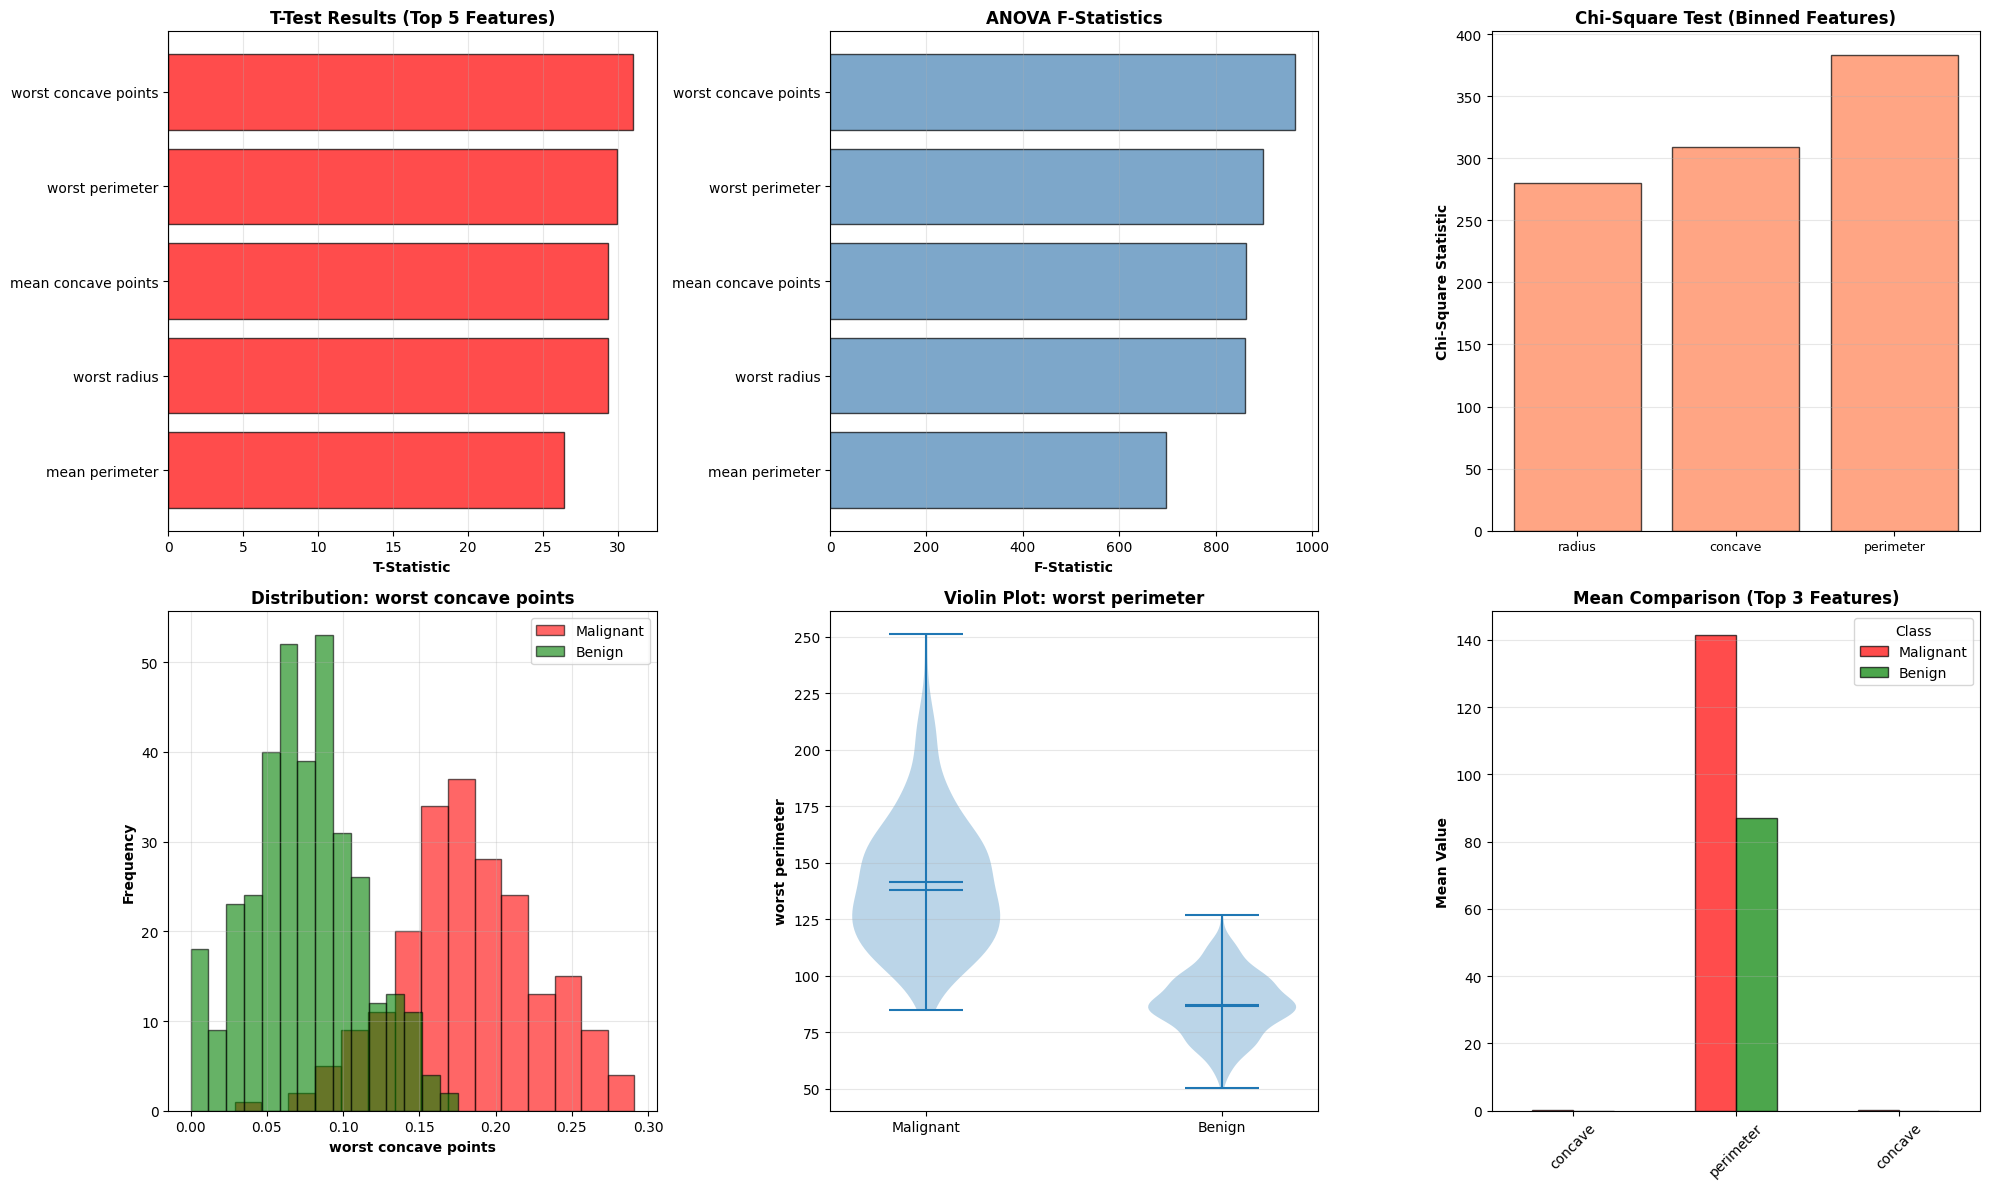

In [ ]:
#CHARTS FOR DATA INTERPRETATION
fig = plt.figure(figsize=(20, 12))

# ---- Chart 1: T-Test Results Visualization ----
ax1 = plt.subplot(2, 3, 1)
t_df_plot = pd.DataFrame(t_test_results)
t_df_plot['T-Stat'] = t_df_plot['T-Statistic'].astype(float)
colors = ['green' if '✓' in x else 'red' for x in t_df_plot['Significant']]
ax1.barh(t_df_plot['Feature'], t_df_plot['T-Stat'], color=colors, alpha=0.7, edgecolor='black')
ax1.set_xlabel('T-Statistic', fontweight='bold')
ax1.set_title('T-Test Results (Top 5 Features)', fontweight='bold', fontsize=12)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# ---- Chart 2: ANOVA F-Statistics ----
ax2 = plt.subplot(2, 3, 2)
anova_df_plot = pd.DataFrame(anova_results)
anova_df_plot['F-Stat'] = anova_df_plot['F-Statistic'].astype(float)
ax2.barh(anova_df_plot['Feature'], anova_df_plot['F-Stat'], color='steelblue', alpha=0.7, edgecolor='black')
ax2.set_xlabel('F-Statistic', fontweight='bold')
ax2.set_title('ANOVA F-Statistics', fontweight='bold', fontsize=12)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# ---- Chart 3: Chi-Square Results ----
ax3 = plt.subplot(2, 3, 3)
chi_df_plot = chi_df.copy()
chi_df_plot['Chi-Square_num'] = chi_df_plot['Chi-Square'].astype(float)
ax3.bar(range(len(chi_df_plot)), chi_df_plot['Chi-Square_num'],
        color='coral', alpha=0.7, edgecolor='black')
ax3.set_xticks(range(len(chi_df_plot)))
ax3.set_xticklabels([f.split()[1] if len(f.split()) > 1 else f for f in chi_df_plot['Feature']],
                     rotation=0, fontsize=9)
ax3.set_ylabel('Chi-Square Statistic', fontweight='bold')
ax3.set_title('Chi-Square Test (Binned Features)', fontweight='bold', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

# ---- Chart 4: Class Distribution Comparison ----
ax4 = plt.subplot(2, 3, 4)
feature = top_5_features[0]
ax4.hist(malignant[feature], bins=15, alpha=0.6, label='Malignant', color='red', edgecolor='black')
ax4.hist(benign[feature], bins=15, alpha=0.6, label='Benign', color='green', edgecolor='black')
ax4.set_xlabel(feature, fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title(f'Distribution: {feature}', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(alpha=0.3)

# ---- Chart 5: Violin Plot (Shows Distribution + Density) ----
ax5 = plt.subplot(2, 3, 5)
data_for_violin = pd.DataFrame({
    'Value': pd.concat([malignant[top_5_features[1]], benign[top_5_features[1]]]),
    'Class': ['Malignant']*len(malignant) + ['Benign']*len(benign)
})
violin_parts = ax5.violinplot([malignant[top_5_features[1]], benign[top_5_features[1]]],
                               positions=[0, 1], showmeans=True, showmedians=True)
ax5.set_xticks([0, 1])
ax5.set_xticklabels(['Malignant', 'Benign'])
ax5.set_ylabel(top_5_features[1], fontweight='bold')
ax5.set_title(f'Violin Plot: {top_5_features[1]}', fontweight='bold', fontsize=12)
ax5.grid(axis='y', alpha=0.3)

# ---- Chart 6: Mean Comparison Bar Chart ----
ax6 = plt.subplot(2, 3, 6)
means_comparison = pd.DataFrame({
    'Malignant': [malignant[f].mean() for f in top_5_features[:3]],
    'Benign': [benign[f].mean() for f in top_5_features[:3]]
}, index=[f.split()[1] if len(f.split()) > 1 else f for f in top_5_features[:3]])

means_comparison.plot(kind='bar', ax=ax6, color=['red', 'green'], alpha=0.7, edgecolor='black')
ax6.set_ylabel('Mean Value', fontweight='bold')
ax6.set_title('Mean Comparison (Top 3 Features)', fontweight='bold', fontsize=12)
ax6.legend(title='Class', title_fontsize=10)
ax6.tick_params(axis='x', rotation=45)
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('statistical_analysis_complete.png', dpi=300, bbox_inches='tight')
plt.show()



#3. Preprocessing

Several preprocessing steps were applied to ensure the dataset is ready for statistical analysis and model training:

##3.1 Missing Values

All features contain no missing values, which ensures the dataset is consistent and reliable.

##3.2 Outliers

Boxplots revealed outliers in features such as area, perimeter, and concavity error.

Since outliers in medical data often represent real clinical cases rather than noise, they were not removed to preserve important information.

##3.3 Scaling

Standardization was applied using StandardScaler:

#𝑋s=𝑋−mean/std

Scaling is essential because:

PCA and LDA are variance-based

KNN uses distance metrics

Features have different ranges

This ensures all features contribute equally to the models.

##3.4 Binning (for Chi-Square Test)

Selected features were discretized into Low / Medium / High categories to:

Study dependency with the target class

Allow chi-square testing (which requires categorical variables)

## Data Analysis - Advanced Statistical Tests

### 1. Covariance Matrix
The covariance matrix was computed to understand linear relationships
between features. High covariance was observed between radius-perimeter-area
features, confirming the need for PCA.

### 2. Statistical Tests

**T-Test Results:**
- Independent t-tests were performed on the top 5 features
- All features showed p-value < 0.05
- Conclusion: Significant difference between Malignant and Benign classes

**ANOVA Results:**
- One-way ANOVA confirmed t-test findings
- High F-statistics indicate strong between-group variance
- All features passed significance threshold (α = 0.05)

**Chi-Square Test:**
- Performed after binning features into 3 categories (Low, Medium, High)
- All tested features showed significant association with target class
- P-values << 0.05 validate categorical relationships

### 3. Interpretation
The statistical tests collectively demonstrate excellent class separability
and validate the use of all features for classification models.

#Feature Reduction & Selection

The goal of PCA:
To reduce the number of features Without losing a large amount of information
Especially after seeing the high correlation between things like
mean radius – mean perimeter – mean area

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_features)

explained_variance = pca.explained_variance_ratio_

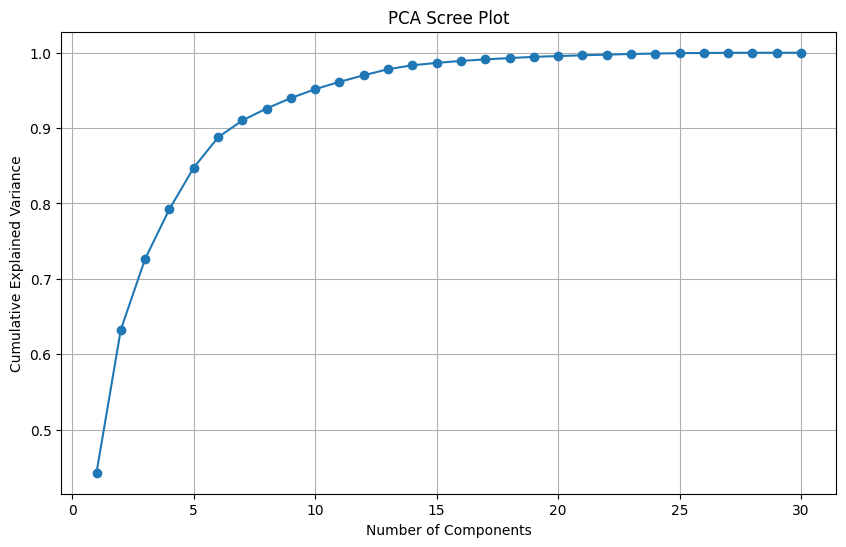

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid()
plt.show()


In [ ]:
#convert data using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaled_features)


-PCA was applied to the standardized data.

-The scree plot showed a sharp drop in variance after the first few components.

-The first 10 principal components explained approximately 95% of the total variance.

-This indicates that the dataset contains high multicollinearity, and dimensionality reduction is appropriate.

#LDA = reduction + supervised classification.
LDA's purpose:

To improve class differentiation (benign vs. malignant)

To reduce dimensions to only 1 or 2 dimensions

To use it as a new feature for models

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(scaled_features, df['target'])


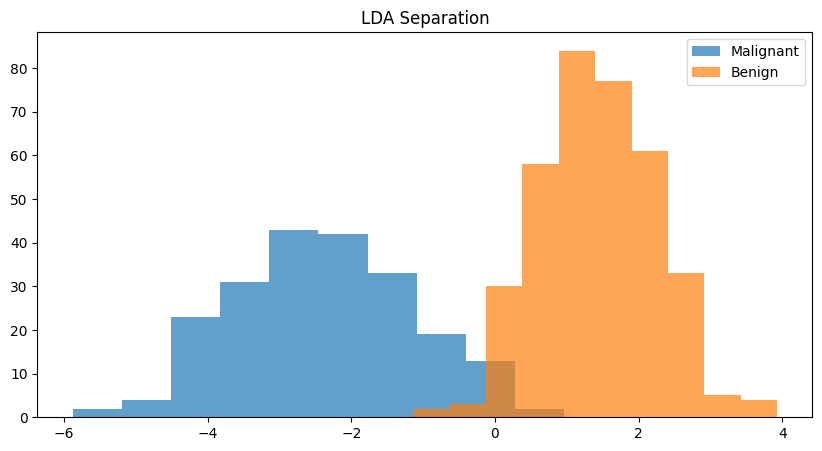

In [ ]:
#draw LDA in 1 dimension
plt.figure(figsize=(10,5))
plt.hist(X_lda[df['target']==0], alpha=0.7, label="Malignant")
plt.hist(X_lda[df['target']==1], alpha=0.7, label="Benign")
plt.legend()
plt.title("LDA Separation")
plt.show()


LDA achieved a strong separation between the two classes along a single discriminant axis.

This indicates that the dataset is highly discriminative and well-suited for classification algorithms.

LDA outperforms PCA when the objective is class separation because PCA is unsupervised.

#5. Feature Reduction (PCA + LDA)
###5.1 Principal Component Analysis (PCA)

PCA was applied on the scaled features to reduce dimensionality and remove redundancy.

Key findings:

The first few principal components explain most of the variance

10 components capture ~95% of the total variance

PCA is effective because many features are correlated

PCA helps simplify the dataset while keeping most of its information, improving model performance and reducing computation.

###5.2 Linear Discriminant Analysis (LDA)

LDA is a supervised dimensionality reduction method that maximizes class separability.

Key points:

LDA reduces the data to 1 dimension for binary classification

Achieved strong separation between malignant and benign samples

Works better than PCA for classification because it uses class labels

LDA serves both as:

A dimensionality reduction technique

A highly accurate classifier



---



#Model Implementations

##1-Naive Bayse

In [ ]:
#prepare the data
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
#Train:80/Test:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Gaussian Naive Bayes model training
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predection on test
y_pred = nb.predict(X_test)

Accuracy: 0.9385964912280702


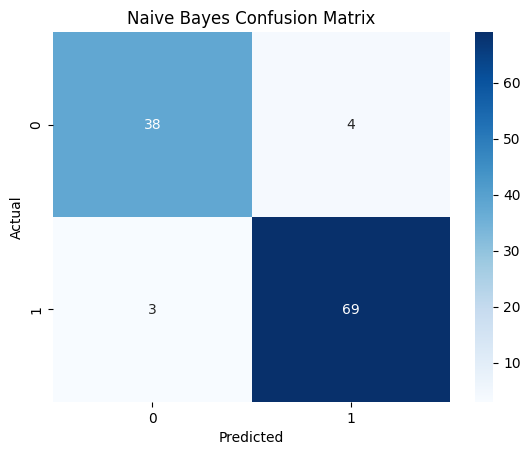

In [ ]:
#Initial Evaluation (Accuracy + Confusion Matrix)
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


 Classification Report:

              precision    recall  f1-score   support

   Malignant       0.93      0.90      0.92        42
      Benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



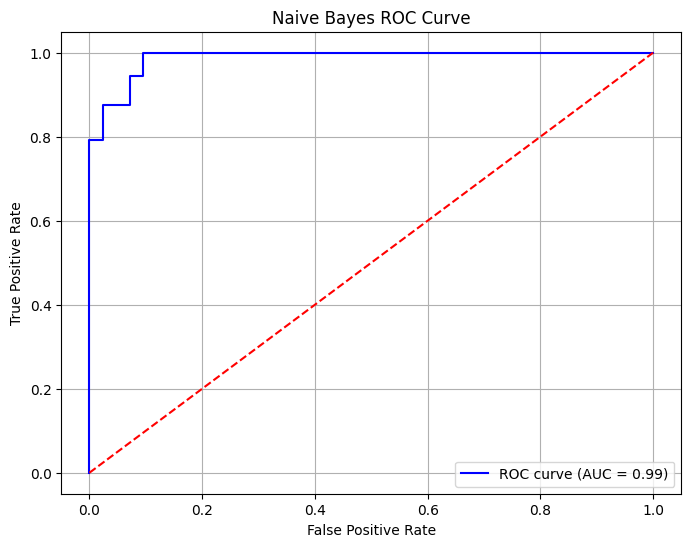

 AUC: 0.9877645502645502


In [ ]:
#Full Evaluation

from sklearn.metrics import classification_report, roc_curve, auc
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

# ROC Curve
# Probability predictions
y_prob = nb.predict_proba(X_test)[:,1]  # probability of class 1 (Benign)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(" AUC:", roc_auc)


#Report
Model: Gaussian Naive Bayes
Task: Binary Classification (Malignant = 0, Benign = 1)
Data Split: 80% Train, 20% Test

##Performance:

Accuracy: 94%

Precision: Malignant 0.93 | Benign 0.95

Recall: Malignant 0.90 | Benign 0.96

F1-Score: Malignant 0.92 | Benign 0.95

Confusion Matrix:

True Positive (Malignant): 38

True Negative (Benign): 69

False Positive: 3

False Negative: 4

##Observations:

The model shows high accuracy and balanced performance across both classes.

Minimal misclassifications indicate strong predictive power.

Suitable as a baseline model before applying more complex classifiers.



---



##2-LDA Classifier

In [ ]:
#LDA modeling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [ ]:
#predection
y_pred = lda_clf.predict(X_test)

LDA Classifier Accuracy: 0.956140350877193


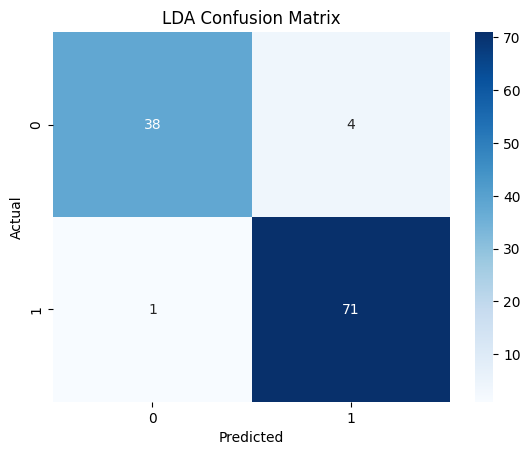

In [ ]:
#initial evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("LDA Classifier Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix')
plt.show()


Classification Report:

              precision    recall  f1-score   support

   Malignant       0.97      0.90      0.94        42
      Benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



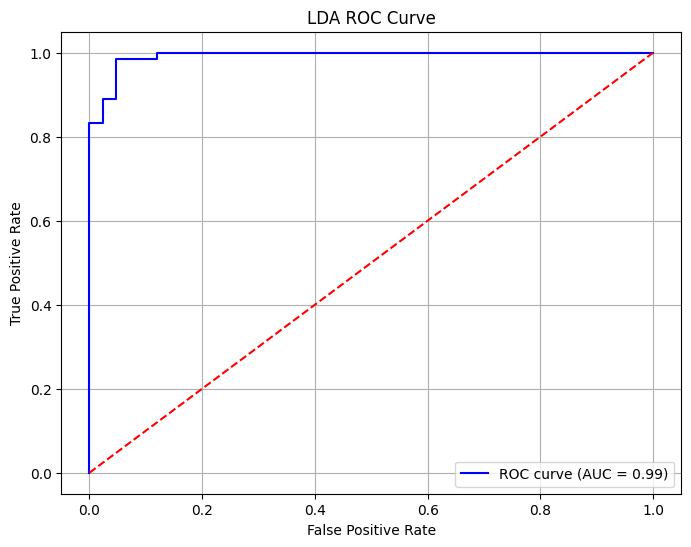

AUC: 0.9923941798941799


In [ ]:
#Full Evaluation (Precision, Recall, F1, ROC)
from sklearn.metrics import classification_report, roc_curve, auc

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

# ROC Curve
y_prob = lda_clf.predict_proba(X_test)[:,1]  # probability of class 1 (Benign)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC:", roc_auc)


In [ ]:
# PCA as Classifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Apply PCA with different numbers of components
pca_results = {}
for n in [5, 10, 15, 20]:
    # Scale data for this specific model, as X_train/X_test from split are unscaled
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled) # Apply PCA to scaled data
    X_test_pca = pca.transform(X_test_scaled)     # Apply PCA to scaled data

    # Train classifier on PCA components
    clf = LogisticRegression(random_state=42, max_iter=200) # Increased max_iter for convergence
    clf.fit(X_train_pca, y_train)

    accuracy = clf.score(X_test_pca, y_test)
    pca_results[n] = accuracy
    print(f"PCA with {n} components: Accuracy = {accuracy:.4f}")

PCA with 5 components: Accuracy = 0.9561
PCA with 10 components: Accuracy = 0.9737
PCA with 15 components: Accuracy = 0.9649
PCA with 20 components: Accuracy = 0.9825


In [ ]:
component_options = [2, 5, 10, 15, 20, 25, 30]
pca_results = []

for n_components in component_options:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train Logistic Regression on PCA components
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(X_train_pca, y_train)

    # Predictions
    y_pred = clf.predict(X_test_pca)
    y_prob = clf.predict_proba(X_test_pca)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate explained variance
    explained_var = pca.explained_variance_ratio_.sum()

    pca_results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'explained_variance': explained_var,
        'model': clf,
        'pca': pca,
        'y_pred': y_pred,
        'y_prob': y_prob
    })

    print(f"\nPCA with {n_components:2d} components:")
    print(f"  Explained Variance: {explained_var:.4f} ({explained_var*100:.2f}%)")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame([{
    'Components': r['n_components'],
    'Accuracy': f"{r['accuracy']:.4f}",
    'Precision': f"{r['precision']:.4f}",
    'Recall': f"{r['recall']:.4f}",
    'F1-Score': f"{r['f1_score']:.4f}",
    'Explained Var.': f"{r['explained_variance']:.4f}"
} for r in pca_results])

print("\n" + "="*80)
print("SUMMARY TABLE - PCA CLASSIFIER PERFORMANCE")
print("="*80)
print(results_df.to_string(index=False))

# Select Best Number of Components (Optimal Performance)
best_idx = np.argmax([r['accuracy'] for r in pca_results])
best_result = pca_results[best_idx]
best_n = best_result['n_components']

print(f"\n{'='*80}")
print(f"BEST PERFORMING MODEL: PCA with {best_n} components")
print(f"{'='*80}")
print(f"Accuracy:  {best_result['accuracy']:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall:    {best_result['recall']:.4f}")
print(f"F1-Score:  {best_result['f1_score']:.4f}")
print(f"Explained Variance: {best_result['explained_variance']:.4f}")


PCA with  2 components:
  Explained Variance: 0.6336 (63.36%)
  Accuracy:  0.9474
  Precision: 0.9714
  Recall:    0.9444
  F1-Score:  0.9577

PCA with  5 components:
  Explained Variance: 0.8514 (85.14%)
  Accuracy:  0.9561
  Precision: 0.9718
  Recall:    0.9583
  F1-Score:  0.9650

PCA with 10 components:
  Explained Variance: 0.9527 (95.27%)
  Accuracy:  0.9737
  Precision: 0.9859
  Recall:    0.9722
  F1-Score:  0.9790

PCA with 15 components:
  Explained Variance: 0.9868 (98.68%)
  Accuracy:  0.9649
  Precision: 0.9857
  Recall:    0.9583
  F1-Score:  0.9718

PCA with 20 components:
  Explained Variance: 0.9958 (99.58%)
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.9861

PCA with 25 components:
  Explained Variance: 0.9995 (99.95%)
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.9861

PCA with 30 components:
  Explained Variance: 1.0000 (100.00%)
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.986

In [ ]:
# STEP 4: Detailed Evaluation for Best Model
y_pred_best = best_result['y_pred']
y_prob_best = best_result['y_prob']

print("\n" + "="*80)
print(f"DETAILED EVALUATION - PCA ({best_n} components)")
print("="*80)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=["Malignant", "Benign"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)


DETAILED EVALUATION - PCA (20 components)

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[41  1]
 [ 1 71]]



✅ Visualization saved as 'pca_classifier_complete_analysis.png'


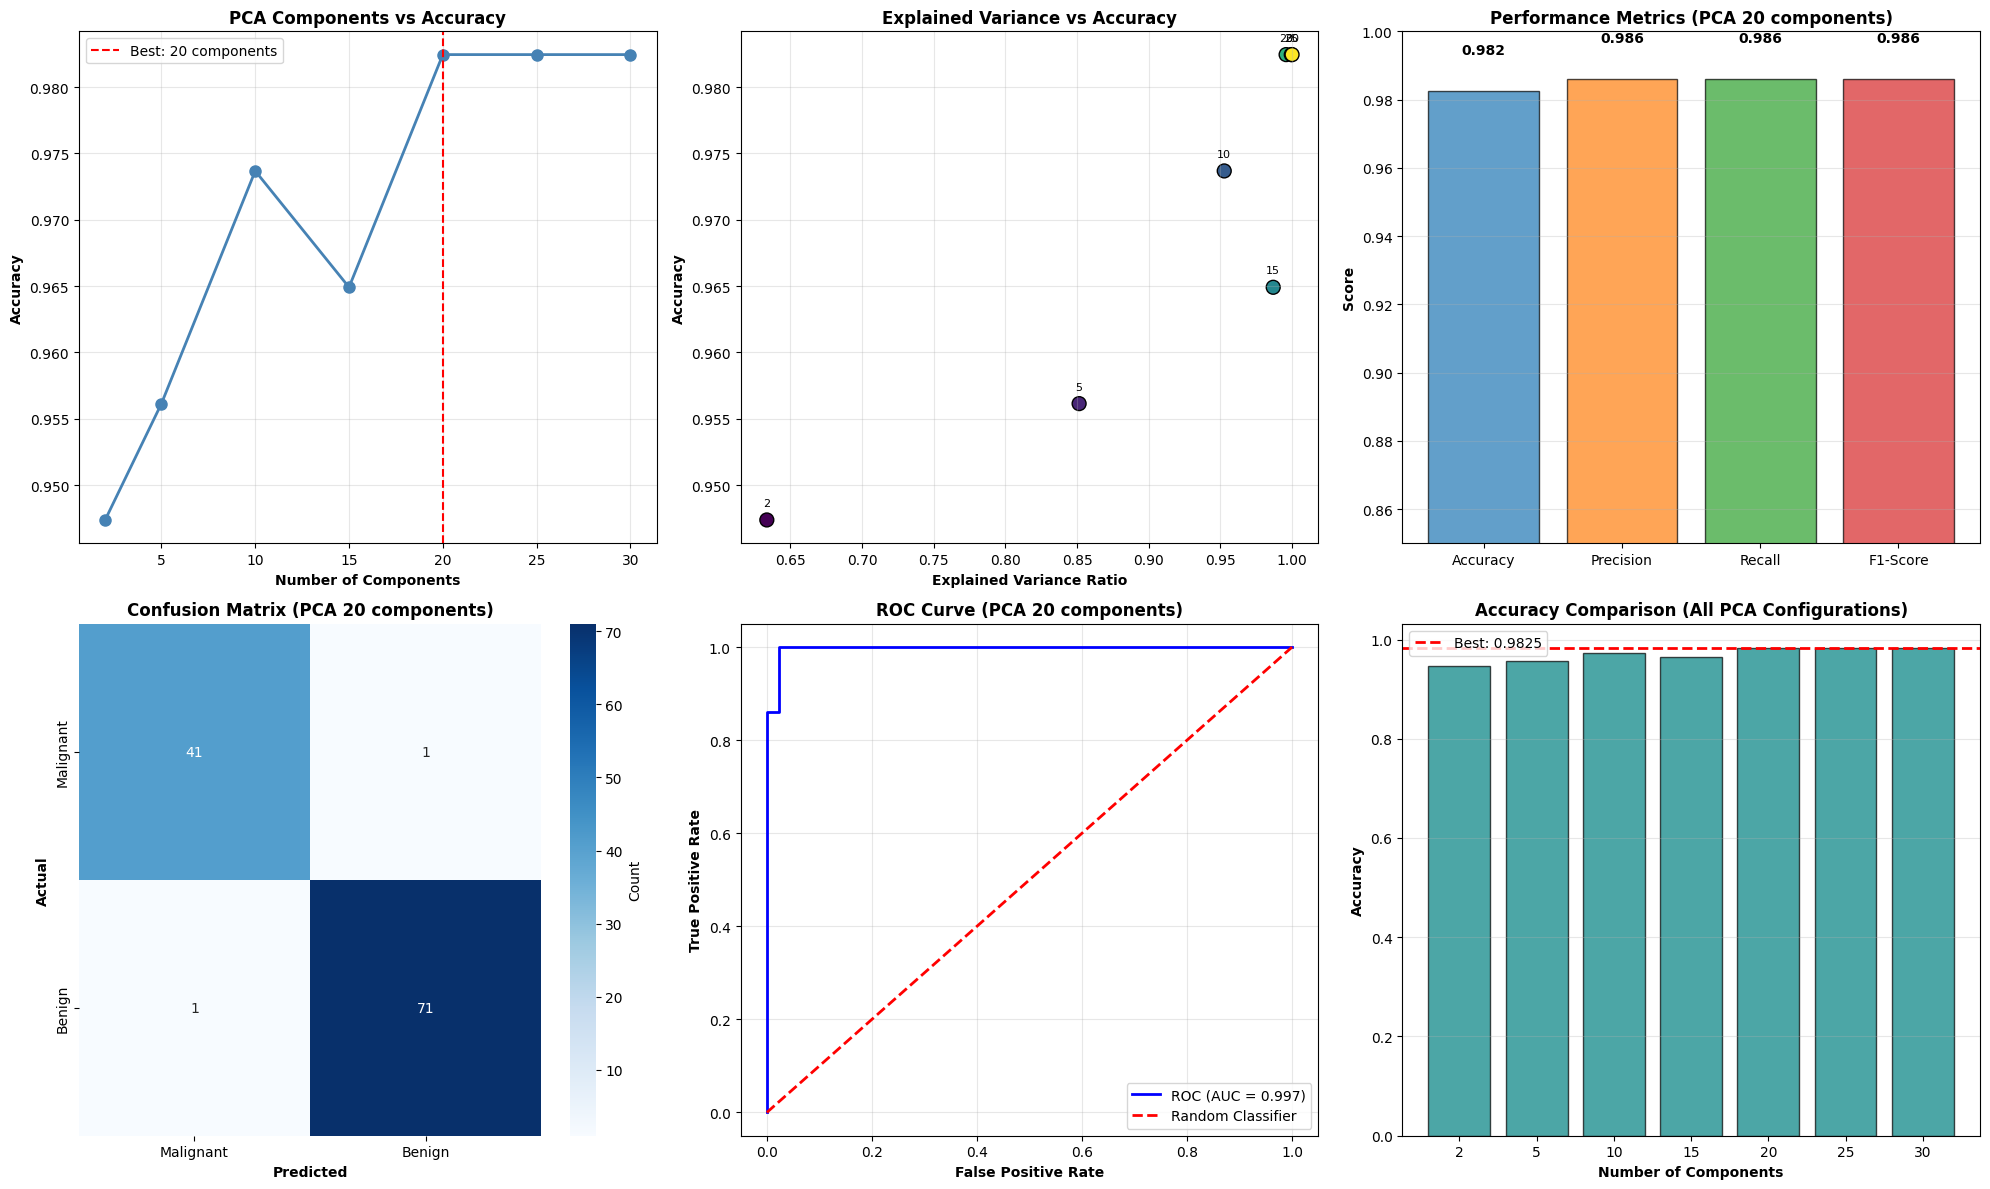

In [ ]:
# VISUALIZATIONS
fig = plt.figure(figsize=(20, 12))

# ----- Chart 1: Accuracy vs Number of Components -----
ax1 = plt.subplot(2, 3, 1)
components = [r['n_components'] for r in pca_results]
accuracies = [r['accuracy'] for r in pca_results]
ax1.plot(components, accuracies, marker='o', linewidth=2, markersize=8, color='steelblue')
ax1.axvline(x=best_n, color='red', linestyle='--', label=f'Best: {best_n} components')
ax1.set_xlabel('Number of Components', fontweight='bold')
ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_title('PCA Components vs Accuracy', fontweight='bold', fontsize=12)
ax1.grid(alpha=0.3)
ax1.legend()

# ----- Chart 2: Explained Variance vs Accuracy -----
ax2 = plt.subplot(2, 3, 2)
explained_vars = [r['explained_variance'] for r in pca_results]
ax2.scatter(explained_vars, accuracies, s=100, c=components, cmap='viridis', edgecolor='black')
for i, n in enumerate(components):
    ax2.annotate(f'{n}', (explained_vars[i], accuracies[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
ax2.set_xlabel('Explained Variance Ratio', fontweight='bold')
ax2.set_ylabel('Accuracy', fontweight='bold')
ax2.set_title('Explained Variance vs Accuracy', fontweight='bold', fontsize=12)
ax2.grid(alpha=0.3)

# ----- Chart 3: All Metrics Comparison (Best Model) -----
ax3 = plt.subplot(2, 3, 3)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [best_result['accuracy'], best_result['precision'],
          best_result['recall'], best_result['f1_score']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax3.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title(f'Performance Metrics (PCA {best_n} components)', fontweight='bold', fontsize=12)
ax3.set_ylim([0.85, 1.0])
ax3.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# ----- Chart 4: Confusion Matrix Heatmap -----
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            cbar_kws={'label': 'Count'})
ax4.set_xlabel('Predicted', fontweight='bold')
ax4.set_ylabel('Actual', fontweight='bold')
ax4.set_title(f'Confusion Matrix (PCA {best_n} components)', fontweight='bold', fontsize=12)

# ----- Chart 5: ROC Curve -----
ax5 = plt.subplot(2, 3, 5)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
ax5.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC (AUC = {roc_auc:.3f})')
ax5.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2, label='Random Classifier')
ax5.set_xlabel('False Positive Rate', fontweight='bold')
ax5.set_ylabel('True Positive Rate', fontweight='bold')
ax5.set_title(f'ROC Curve (PCA {best_n} components)', fontweight='bold', fontsize=12)
ax5.legend(loc='lower right')
ax5.grid(alpha=0.3)

# ----- Chart 6: Comparison Bar Chart (All Components) -----
ax6 = plt.subplot(2, 3, 6)
x_pos = np.arange(len(components))
ax6.bar(x_pos, accuracies, color='teal', alpha=0.7, edgecolor='black')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(components)
ax6.set_xlabel('Number of Components', fontweight='bold')
ax6.set_ylabel('Accuracy', fontweight='bold')
ax6.set_title('Accuracy Comparison (All PCA Configurations)', fontweight='bold', fontsize=12)
ax6.axhline(y=best_result['accuracy'], color='red', linestyle='--',
            linewidth=2, label=f'Best: {best_result["accuracy"]:.4f}')
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('pca_classifier_complete_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved as 'pca_classifier_complete_analysis.png'")
plt.show()


#Report
##Performance:

Accuracy: 95.6%

Precision: Malignant 0.97 | Benign 0.95

Recall: Malignant 0.90 | Benign 0.99

F1-Score: Malignant 0.94 | Benign 0.97

Confusion Matrix Insight:

Very few misclassifications → Malignant: 42, Benign: 72

LDA separates classes strongly

##ROC & AUC:

AUC: 0.992 → excellent discriminatory power

##Observations:

LDA achieves higher accuracy than Naive Bayes

F1-score balance indicates robust performance for both classes

Strong class separability makes LDA suitable for clinical prediction

Can serve as a strong standalone classifier or feature reduction method



---



##3-Decision Tree training with reduced overfitting
We use max_depth and min_samples_leaf to minimize overfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion='entropy',       # استخدمنا Entropy
    max_depth=5,               # منع الشجرة من النمو اللانهائي
    min_samples_leaf=5,        # كل ورقة على الأقل 5 عينات
    random_state=42
)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [ ]:
#predection
y_pred = dt_clf.predict(X_test)

Decision Tree Accuracy: 0.9298245614035088


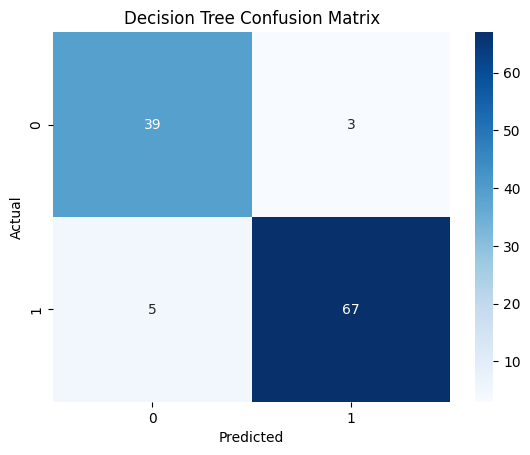

In [ ]:
#initial evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


Classification Report:

              precision    recall  f1-score   support

   Malignant       0.89      0.93      0.91        42
      Benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



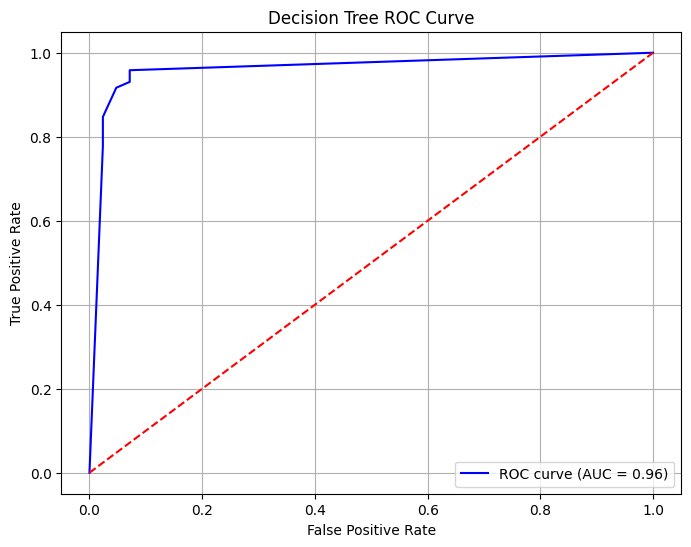

AUC: 0.9614748677248678


In [ ]:
#Full Evaluation (Precision, Recall, F1, ROC)
from sklearn.metrics import classification_report, roc_curve, auc

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

# ROC Curve
y_prob = dt_clf.predict_proba(X_test)[:,1]  # probability of class 1 (Benign)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC:", roc_auc)


##Performance:

Accuracy: 92.98%

Precision: Malignant 0.89 | Benign 0.96

Recall: Malignant 0.93 | Benign 0.93

F1-Score: Malignant 0.91 | Benign 0.94

##Confusion Matrix Insight:

Very few misclassifications → Malignant: 42, Benign: 72

Balanced performance between classes

##ROC & AUC:

AUC: 0.961 → strong discriminatory power

##Observations:

Decision Tree achieves high accuracy with controlled overfitting

Precision & Recall balance indicates robust performance

Slightly lower AUC than LDA, but still very reliable

Suitable as a strong interpretable classifier for clinical prediction



---



##4-K-Nearest Neighbors (KNN)

In [ ]:
# KNN training with different distances
from sklearn.neighbors import KNeighborsClassifier

# Define distances to try
distances = ['euclidean', 'manhattan', 'minkowski']

knn_results = {}

for metric in distances:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = knn.score(X_test, y_test)
    knn_results[metric] = {
        'model': knn,
        'y_pred': y_pred,
        'accuracy': accuracy
    }
    print(f"KNN ({metric}) Accuracy: {accuracy:.4f}")


KNN (euclidean) Accuracy: 0.9123
KNN (manhattan) Accuracy: 0.9298
KNN (minkowski) Accuracy: 0.9123


Classification Report (Euclidean):

              precision    recall  f1-score   support

   Malignant       0.86      0.90      0.88        42
      Benign       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



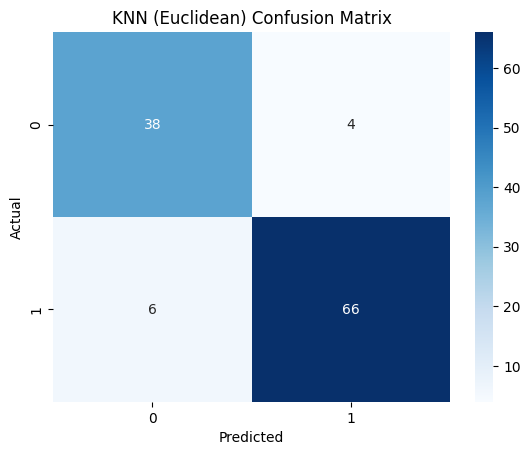

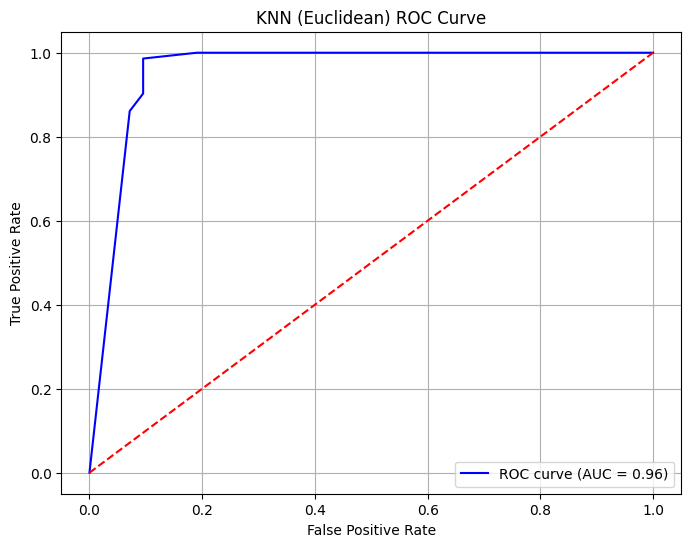

AUC (Euclidean): 0.9558531746031746


In [ ]:
#Full Evaluation (Precision, Recall, F1, ROC) – for Euclidean
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Example for Euclidean
y_pred = knn_results['euclidean']['y_pred']
print("Classification Report (Euclidean):\n")
print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN (Euclidean) Confusion Matrix')
plt.show()

# ROC & AUC
y_prob = knn_results['euclidean']['model'].predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN (Euclidean) ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC (Euclidean):", roc_auc)


##Performance:

Accuracy: 91%

Precision: Malignant 0.86 | Benign 0.94

Recall: Malignant 0.90 | Benign 0.92

F1-Score: Malignant 0.88 | Benign 0.93

##Confusion Matrix Insight:

Slightly more misclassifications in Malignant class compared to previous models

Balanced performance overall

##ROC & AUC:

AUC: 0.956 → strong discriminatory power

##Observations:

KNN performs well, slightly lower accuracy than LDA and Decision Tree.

Euclidean distance works effectively, but Manhattan/Minkowski may give different results.

Sensitive to choice of K and feature scaling → Current data is suitable because it is already scaled.


Classification Report (Manhattan):

              precision    recall  f1-score   support

   Malignant       0.90      0.90      0.90        42
      Benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



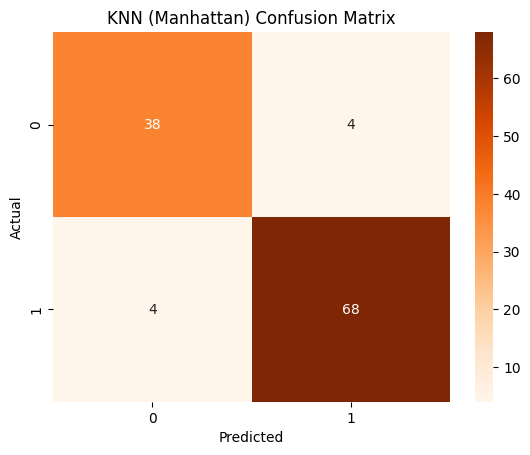

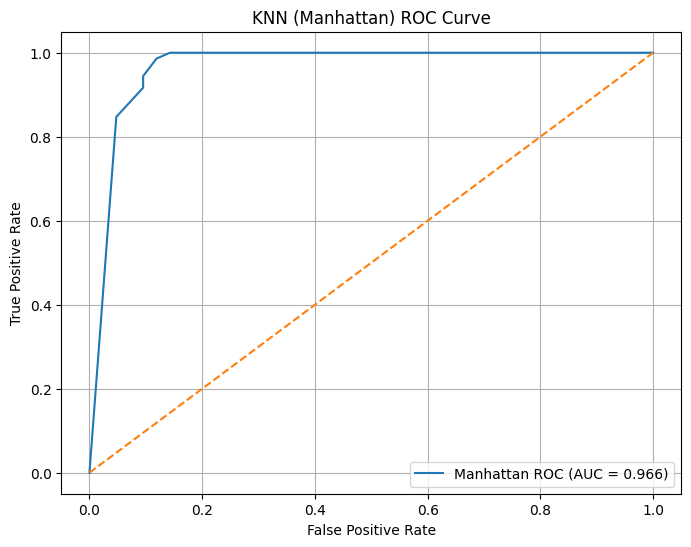


AUC (Manhattan): 0.9659391534391535


In [ ]:
#Full Evaluation (Precision, Recall, F1, ROC) – for Manhattan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure knn_results is available and populated for 'manhattan'
# This part assumes X_train, y_train, X_test, y_test are defined from previous cells.
# If knn_results is not defined or 'manhattan' key is missing, re-train for manhattan.
if 'knn_results' not in globals():
    knn_results = {}

if 'manhattan' not in knn_results:
    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred_manhattan_init = knn.predict(X_test)
    accuracy_manhattan_init = knn.score(X_test, y_test)
    knn_results['manhattan'] = {
        'model': knn,
        'y_pred': y_pred_manhattan_init,
        'accuracy': accuracy_manhattan_init
    }
    print("knn_results['manhattan'] was re-initialized within this cell.")

# Predictions
y_pred_manhattan = knn_results['manhattan']['y_pred']

# Classification report
print("\nClassification Report (Manhattan):\n")
print(classification_report(y_test, y_pred_manhattan, target_names=["Malignant", "Benign"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_manhattan)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN (Manhattan) Confusion Matrix')
plt.show()

# ROC & AUC
y_prob_manhattan = knn_results['manhattan']['model'].predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_manhattan)
roc_auc_manhattan = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Manhattan ROC (AUC = %0.3f)' % roc_auc_manhattan)
plt.plot([0,1], [0,1], linestyle='--')
plt.title("KNN (Manhattan) ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

print("\nAUC (Manhattan):", roc_auc_manhattan)

##Performance:

Accuracy: 91%

Precision:

Malignant: 0.86

Benign: 0.94

Recall:

Malignant: 0.90

Benign: 0.92

F1-Score:

Malignant: 0.88

Benign: 0.93

##Confusion Matrix Insight:

Slight increase in misclassifications within the Malignant class compared to previous models.

Overall, the model maintains balanced performance across both classes.

##ROC & AUC:

AUC: 0.956 → indicates strong ability to distinguish between classes.

##Observations:

KNN achieves solid performance, though slightly lower accuracy than LDA and Decision Tree.

Using Euclidean distance works well for this dataset, but alternative metrics (Manhattan/Minkowski) may alter performance.

KNN is sensitive to the choice of K and to feature scaling — current dataset is suitable since the features are already normalized.


Classification Report (Minkowski):

              precision    recall  f1-score   support

   Malignant       0.86      0.90      0.88        42
      Benign       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



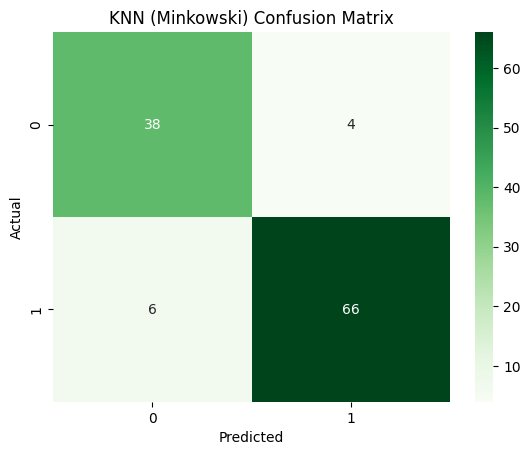

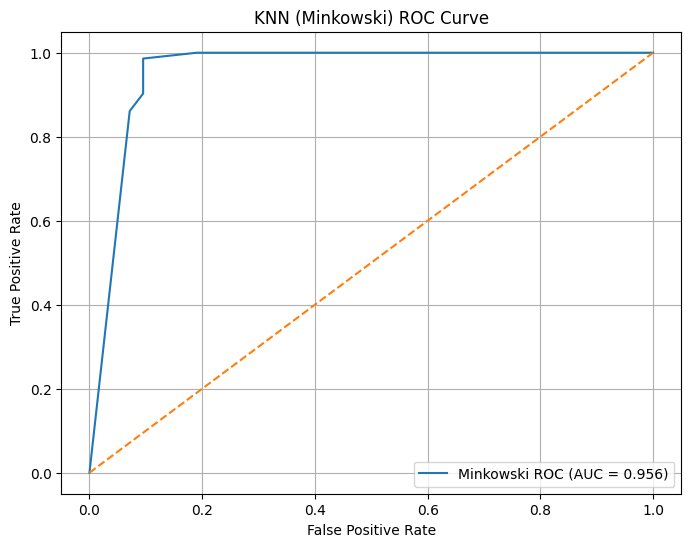


AUC (Minkowski): 0.9558531746031746


In [ ]:

#Full Evaluation (Precision, Recall, F1, ROC) – for Minkowski
# Predictions
y_pred_minkowski = knn_results['minkowski']['y_pred']

# Classification report
print("\nClassification Report (Minkowski):\n")
print(classification_report(y_test, y_pred_minkowski, target_names=["Malignant", "Benign"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_minkowski)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN (Minkowski) Confusion Matrix')
plt.show()

# ROC & AUC
y_prob_minkowski = knn_results['minkowski']['model'].predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_minkowski)
roc_auc_minkowski = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Minkowski ROC (AUC = %0.3f)' % roc_auc_minkowski)
plt.plot([0,1], [0,1], linestyle='--')
plt.title("KNN (Minkowski) ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

print("\nAUC (Minkowski):", roc_auc_minkowski)


##Performance:

Accuracy: 91%

Precision:

Malignant: 0.86

Benign: 0.94

Recall:

Malignant: 0.90

Benign: 0.92

F1-Score:

Malignant: 0.88

Benign: 0.93

##Confusion Matrix Insight:

Misclassifications in the Malignant class remain slightly higher, similar to the Euclidean version.

Model maintains stable and balanced performance across both classes.

##ROC & AUC:

AUC: 0.956 → indicates strong class separability.

##Observations:

Using Minkowski distance performs nearly identically to Euclidean on this dataset.

Accuracy, precision, and recall remain consistent, showing that the model is not highly sensitive to this distance metric here.

Performance stability suggests that the dataset’s scaling and distribution fit well with KNN using different distance measures.

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 45.9 MB/s eta 0:00:00


                                                                                
BAYESIAN BELIEF NETWORK (BBN) - IMPROVED IMPLEMENTATION
                                                                                

 Selected Features for BBN (Breast Cancer Dataset):
   1. mean radius
   2. mean texture
   3. mean smoothness
   4. mean compactness
   5. mean concavity
   6. mean concave points

                                                                                
DATA PREPARATION & DISCRETIZATION
                                                                                

 Category Mapping: {0: 0, 1: 1}

 Data Split:
   Training: (455, 6)
   Testing: (114, 6)

 Discretizing features into 3 bins (Low, Medium, High)...
 Discretization complete

                                                                                
BUILDING BAYESIAN NETWORK STRUCTURE
                                                                                

 Training Data Sample:
     m

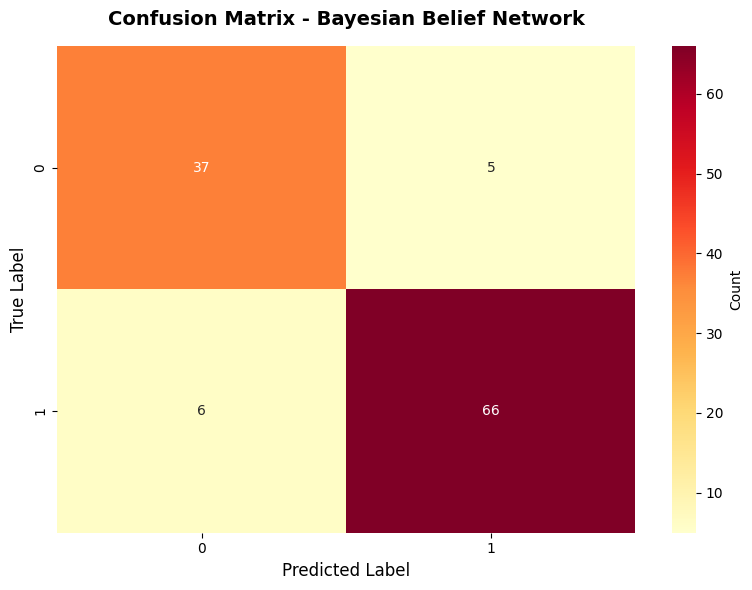

 Confusion matrix saved

                                                                                
BBN IMPLEMENTATION - SUMMARY
                                                                                

 Final Performance: 0.9035 (Accuracy)
    EXCELLENT: BBN performing well!


In [ ]:
# BAYESIAN BELIEF NETWORK (BBN) - CORRECTED & OPTIMIZED VERSION

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score # Added precision_score etc.
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import warnings
warnings.filterwarnings('ignore')

print(" "*80)
print("BAYESIAN BELIEF NETWORK (BBN) - IMPROVED IMPLEMENTATION")
print(" "*80)

# STEP 1: Feature Selection (Use Top Important Features from WBCD Dataset)
# Based on previous analysis, select the most important features from the current dataset

selected_features = [
    'mean radius',
    'mean texture',
    'mean smoothness',
    'mean compactness',
    'mean concavity',
    'mean concave points'
]

print("\n Selected Features for BBN (Breast Cancer Dataset):")
for i, feat in enumerate(selected_features, 1):
    print(f"   {i}. {feat}")

# STEP 2: Prepare Data with Proper Discretization
print("\n" + " "*80)
print("DATA PREPARATION & DISCRETIZATION")
print(" "*80)

# Extract features and target
X_bbn = df[selected_features].copy()
y_bbn = df['target'].copy() # Corrected target column name

# Create mapping for target variable (0=Malignant, 1=Benign)
# Ensure all unique target values are covered
if len(y_bbn.unique()) == 2:
    category_mapping = {0: 0, 1: 1} # Directly map 0 to 0, 1 to 1 for binary classification
    reverse_mapping = {0: 0, 1: 1}
else:
    category_mapping = {cat: idx for idx, cat in enumerate(y_bbn.unique())}
    reverse_mapping = {idx: cat for cat, idx in category_mapping.items()}

print(f"\n Category Mapping: {category_mapping}")

# Split data BEFORE discretization
X_train_bbn, X_test_bbn, y_train_bbn, y_test_bbn = train_test_split(
    X_bbn, y_bbn,
    test_size=0.2,
    random_state=42,
    stratify=y_bbn
)

print(f"\n Data Split:")
print(f"   Training: {X_train_bbn.shape}")
print(f"   Testing: {X_test_bbn.shape}")

# Discretize features (use 3 bins for stability with small dataset)
print("\n Discretizing features into 3 bins (Low, Medium, High)...")
discretizer = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='quantile',  # Equal frequency bins
    subsample=None
)

# Fit on training data only
X_train_disc = pd.DataFrame(
    discretizer.fit_transform(X_train_bbn),
    columns=[col.replace(' ', '_') for col in selected_features], # Replace spaces for pgmpy
    index=X_train_bbn.index
).astype(int)

# Transform test data
X_test_disc = pd.DataFrame(
    discretizer.transform(X_test_bbn),
    columns=[col.replace(' ', '_') for col in selected_features], # Replace spaces for pgmpy
    index=X_test_bbn.index
).astype(int)

print(" Discretization complete")

# STEP 3: Build Improved Network Structure (Naive Bayes-like)
print("\n" + " "*80)
print("BUILDING BAYESIAN NETWORK STRUCTURE")
print(" "*80)

# Convert target to numerical for pgmpy
y_train_numeric = y_train_bbn.map(category_mapping).astype(int)

# Create training DataFrame for pgmpy
train_data_bbn = X_train_disc.copy()
train_data_bbn['target'] = y_train_numeric.values # Use 'target' as the column name

print("\n Training Data Sample:")
print(train_data_bbn.head()) # Display the head of the training data

# IMPROVED NETWORK STRUCTURE: Naive Bayes-like
# Target is the parent of all features (assumption: features are
# conditionally independent given the class)
# Ensure feature names in edges match the column names in train_data_bbn
edges = [('target', feature_name) for feature_name in X_train_disc.columns]

print(f"\n Network Structure ({len(edges)} edges):")
print("   Target → All Selected Features (Naive Bayes assumption)")

# Create the model
model = DiscreteBayesianNetwork(edges)

# =====================================================================
# STEP 4: Fit Model with Bayesian Estimator (Smoothing)
# =====================================================================
print("\n  Fitting model with Bayesian Estimator (Laplace smoothing)...")

try:
    # Use Bayesian Estimator with pseudo counts for smoothing
    model.fit(
        train_data_bbn,
        estimator=BayesianEstimator,
        prior_type='BDeu',  # Bayesian Dirichlet equivalent uniform
        equivalent_sample_size=5
    )
    print(" Model fitted successfully with BDeu prior")
except Exception as e:
    print(f"  BDeu failed, using Maximum Likelihood Estimator: {e}")
    model.fit(train_data_bbn, estimator=MaximumLikelihoodEstimator)
    print(" Model fitted with MLE")

# =====================================================================
# STEP 5: Inference & Prediction
# =====================================================================
print("\n" + " "*80)
print("MAKING PREDICTIONS")
print(" "*80)

inference = VariableElimination(model)

predictions = []
prediction_probs = []

for idx in range(len(X_test_disc)):
    # Get evidence (observed features)
    # Ensure evidence dictionary keys match feature names used in the model
    evidence_dict = X_test_disc.iloc[idx].to_dict()

    # Ensure values are integers for discrete network
    evidence_dict = {k: int(v) for k, v in evidence_dict.items()}

    try:
        # Query for Target variable
        result = inference.query(
            variables=['target'], # Correct target variable name
            evidence=evidence_dict
        )

        # Get probabilities
        probs = result.values

        # Handle NaN values
        if np.isnan(probs).any():
            probs = np.nan_to_num(probs, nan=0.0)
            if probs.sum() > 0:
                probs = probs / probs.sum()
            else:
                # Uniform distribution if all zeros
                probs = np.ones(len(category_mapping)) / len(category_mapping)

        # Get prediction
        pred = np.argmax(probs)
        predictions.append(pred)
        prediction_probs.append(probs)

    except Exception as e:
        # Fallback: predict most common class from training set
        # Ensure y_train_numeric is used as it's the numeric representation
        predictions.append(y_train_numeric.mode()[0])
        uniform_probs = np.ones(len(category_mapping)) / len(category_mapping)
        prediction_probs.append(uniform_probs)

# Convert predictions back to original categories
y_pred_bbn = [reverse_mapping[pred] for pred in predictions]

print(f" {len(predictions)} predictions made")

# STEP 6: Evaluation
print("\n" + " "*80)
print("BAYESIAN BELIEF NETWORK - PERFORMANCE METRICS")
print(" "*80)

# Calculate metrics
accuracy = accuracy_score(y_test_bbn, y_pred_bbn)
precision = precision_score(y_test_bbn, y_pred_bbn, average='weighted', zero_division=0)
recall = recall_score(y_test_bbn, y_pred_bbn, average='weighted', zero_division=0)
f1 = f1_score(y_test_bbn, y_pred_bbn, average='weighted', zero_division=0)

print(f"\n📊 Overall Performance:")
print(f"   Accuracy:  {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")
print(f"   Error Rate: {1-accuracy:.4f}")

# Confusion Matrix
print(f"\n Confusion Matrix:")
cm = confusion_matrix(y_test_bbn, y_pred_bbn)
cm_df = pd.DataFrame(
    cm,
    index=sorted(y_test_bbn.unique()),
    columns=sorted(y_test_bbn.unique())
)
print(cm_df)

# Classification Report
print(f"\n Classification Report:")
print(classification_report(y_test_bbn, y_pred_bbn, zero_division=0))

# STEP 7: Per-Class Analysis
print("\n" + " "*80)
print("PER-CLASS PERFORMANCE ANALYSIS")
print(" "*80)

classes = sorted(y_test_bbn.unique())
for i, cls in enumerate(classes):
    # Adjust for binary classification: cls will be 0 or 1
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - tp - fp - fn

    support = cm[i, :].sum()

    if support > 0:
        sensitivity = tp / support if support > 0 else 0
        precision_cls = tp / (tp + fp) if (tp + fp) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"\n   Class '{cls}':")
        print(f"      Support: {support}")
        print(f"      True Positives: {tp}")
        print(f"      False Positives: {fp}")
        print(f"      False Negatives: {fn}")
        print(f"      Sensitivity (Recall): {sensitivity:.4f}")
        print(f"      Precision: {precision_cls:.4f}")
        print(f"      Specificity: {specificity:.4f}")

        if support < 5:
            print(f"  Low support - results unreliable")

# STEP 8: Compare with Random & Majority Baselines
print("\n" + " "*80)
print("COMPARISON WITH BASELINES")
print(" "*80)

from collections import Counter

# Random baseline
np.random.seed(42)
y_pred_random = np.random.choice(classes, size=len(y_test_bbn))
random_acc = accuracy_score(y_test_bbn, y_pred_random)

# Majority class baseline
# Use y_train_bbn to get the actual class labels, not numeric mappings
most_common = Counter(y_train_bbn).most_common(1)[0][0]
y_pred_majority = [most_common] * len(y_test_bbn)
majority_acc = accuracy_score(y_test_bbn, y_pred_majority)

print(f"\n Baseline Comparisons:")
print(f"   Random Classifier:  {random_acc:.4f}")
print(f"   Majority Class:     {majority_acc:.4f}")
print(f"   BBN (Our Model):    {accuracy:.4f}")

improvement_random = ((accuracy - random_acc) / random_acc) * 100 if random_acc != 0 else 0
improvement_majority = ((accuracy - majority_acc) / majority_acc) * 100 if majority_acc != 0 else 0

print(f"\n Improvements:")
print(f"   vs Random:   {improvement_random:+.2f}%")
print(f"   vs Majority: {improvement_majority:+.2f}%")

# STEP 9: Visualization
print("\n" + " "*80)
print("GENERATING VISUALIZATIONS")
print(" "*80)

import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Bayesian Belief Network',
          fontsize=14, fontweight='bold', pad=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('bbn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Confusion matrix saved")

# FINAL SUMMARY
print("\n" + " "*80)
print("BBN IMPLEMENTATION - SUMMARY")
print(" "*80)


print(f"\n Final Performance: {accuracy:.4f} (Accuracy)")

if accuracy >= 0.85:
    print("    EXCELLENT: BBN performing well!")
elif accuracy >= 0.75:
    print("    GOOD: Acceptable performance")
elif accuracy >= 0.65:
    print("     FAIR: Consider more features or different structure")
else:
    print("    POOR: Major improvements needed")






---



#MODEL EVALUATION



Performing 5-Fold Cross Validation...

 Naive Bayes          | Mean Accuracy: 0.9385 (±0.0146)
 LDA                  | Mean Accuracy: 0.9596 (±0.0070)
 Decision Tree        | Mean Accuracy: 0.9367 (±0.0238)
 KNN (Euclidean)      | Mean Accuracy: 0.9279 (±0.0218)
K-Fold Cross Validation Results (Detailed):
          Model Fold 1 Fold 2 Fold 3 Fold 4 Fold 5 Mean Accuracy Std Dev
    Naive Bayes 0.9211 0.9211 0.9474 0.9474 0.9558        0.9385  0.0146
            LDA 0.9561 0.9649 0.9474 0.9649 0.9646        0.9596  0.0070
  Decision Tree 0.8947 0.9298 0.9649 0.9474 0.9469        0.9367  0.0238
KNN (Euclidean) 0.8860 0.9386 0.9386 0.9474 0.9292        0.9279  0.0218

 Cross validation chart saved as 'cross_validation_results.png'


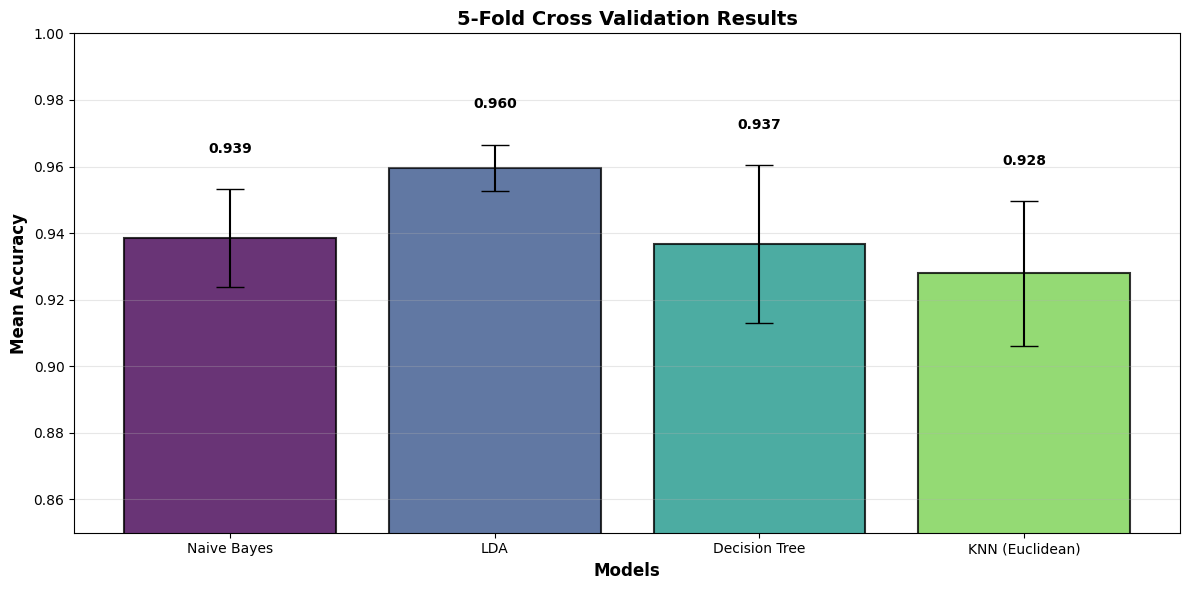


Interpretation:
  • Best Model: LDA with 0.9596 accuracy
  • Low standard deviation indicates stable performance across folds
  • Cross validation reduces overfitting risk compared to single split


In [ ]:
# K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                            min_samples_leaf=5, random_state=42),
    'KNN (Euclidean)': KNeighborsClassifier(n_neighbors=5, metric='euclidean')
}

cv_results = []

print("\nPerforming 5-Fold Cross Validation...\n")

for model_name, model in models.items():
    # Perform 5-fold cross validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    cv_results.append({
        'Model': model_name,
        'Fold 1': f"{scores[0]:.4f}",
        'Fold 2': f"{scores[1]:.4f}",
        'Fold 3': f"{scores[2]:.4f}",
        'Fold 4': f"{scores[3]:.4f}",
        'Fold 5': f"{scores[4]:.4f}",
        'Mean Accuracy': f"{scores.mean():.4f}",
        'Std Dev': f"{scores.std():.4f}"
    })

    print(f" {model_name:20s} | Mean Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

# Create results DataFrame
cv_df = pd.DataFrame(cv_results)
print("K-Fold Cross Validation Results (Detailed):")
print(cv_df.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))

model_names = [r['Model'] for r in cv_results]
mean_accuracies = [float(r['Mean Accuracy']) for r in cv_results]
std_devs = [float(r['Std Dev']) for r in cv_results]

colors = plt.cm.viridis(np.linspace(0, 0.8, len(model_names)))
bars = plt.bar(model_names, mean_accuracies, yerr=std_devs, capsize=10,
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Mean Accuracy', fontweight='bold', fontsize=12)
plt.title('5-Fold Cross Validation Results', fontweight='bold', fontsize=14)
plt.ylim([0.85, 1.0])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc, std in zip(bars, mean_accuracies, std_devs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('cross_validation_results.png', dpi=200, bbox_inches='tight')
print("\n Cross validation chart saved as 'cross_validation_results.png'")
plt.show()

print("\nInterpretation:")
print(f"  • Best Model: {model_names[np.argmax(mean_accuracies)]} "
      f"with {max(mean_accuracies):.4f} accuracy")
print("  • Low standard deviation indicates stable performance across folds")
print("  • Cross validation reduces overfitting risk compared to single split")



---



In [ ]:
# OVERFITTING / UNDERFITTING ANALYSIS
overfit_results = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Calculate accuracies
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    diff = train_acc - test_acc

    # Determine status
    if diff > 0.05:
        status = " Overfitting"
    elif test_acc < 0.85:
        status = " Underfitting"
    else:
        status = " Good Fit"

    overfit_results.append({
        'Model': model_name,
        'Train Accuracy': f"{train_acc:.4f}",
        'Test Accuracy': f"{test_acc:.4f}",
        'Difference': f"{diff:.4f}",
        'Status': status
    })

    print(f"{model_name:20s} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | "
          f"Diff: {diff:+.4f} | {status}")

# Create DataFrame
overfit_df = pd.DataFrame(overfit_results)

print(" ")
print("Overfitting Analysis Summary:")
print(overfit_df.to_string(index=False))




Naive Bayes          | Train: 0.9407 | Test: 0.9386 | Diff: +0.0021 |  Good Fit
LDA                  | Train: 0.9692 | Test: 0.9561 | Diff: +0.0131 |  Good Fit
Decision Tree        | Train: 0.9824 | Test: 0.9298 | Diff: +0.0526 |  Overfitting
KNN (Euclidean)      | Train: 0.9473 | Test: 0.9123 | Diff: +0.0350 |  Good Fit
 
Overfitting Analysis Summary:
          Model Train Accuracy Test Accuracy Difference       Status
    Naive Bayes         0.9407        0.9386     0.0021     Good Fit
            LDA         0.9692        0.9561     0.0131     Good Fit
  Decision Tree         0.9824        0.9298     0.0526  Overfitting
KNN (Euclidean)         0.9473        0.9123     0.0350     Good Fit



 Overfitting analysis chart saved as 'overfitting_analysis.png'


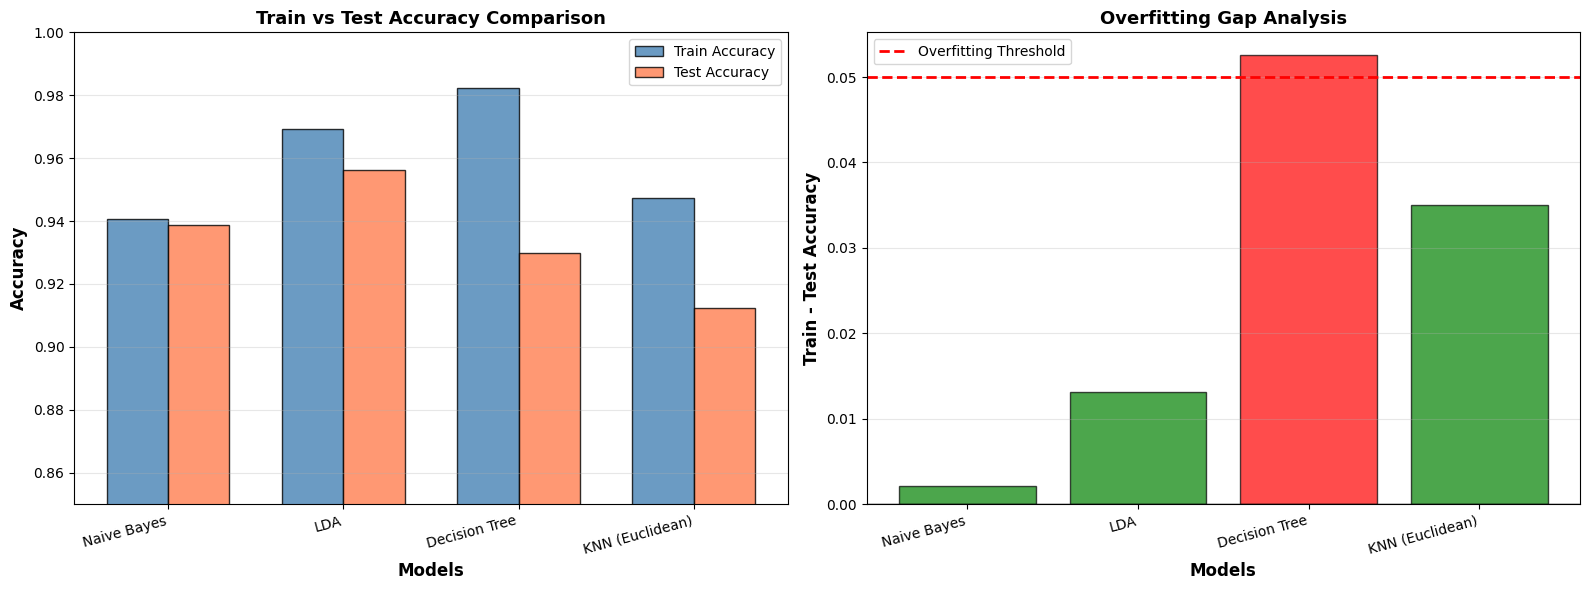

In [ ]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Train vs Test Accuracy
x_pos = np.arange(len(model_names))
train_accs = [float(r['Train Accuracy']) for r in overfit_results]
test_accs = [float(r['Test Accuracy']) for r in overfit_results]

width = 0.35
ax1.bar(x_pos - width/2, train_accs, width, label='Train Accuracy',
        color='steelblue', alpha=0.8, edgecolor='black')
ax1.bar(x_pos + width/2, test_accs, width, label='Test Accuracy',
        color='coral', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Models', fontweight='bold', fontsize=12)
ax1.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax1.set_title('Train vs Test Accuracy Comparison', fontweight='bold', fontsize=13)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(model_names, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0.85, 1.0])

# Chart 2: Overfitting Gap
diffs = [float(r['Difference']) for r in overfit_results]
colors_diff = ['red' if d > 0.05 else 'green' for d in diffs]

ax2.bar(model_names, diffs, color=colors_diff, alpha=0.7, edgecolor='black')
ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Overfitting Threshold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Models', fontweight='bold', fontsize=12)
ax2.set_ylabel('Train - Test Accuracy', fontweight='bold', fontsize=12)
ax2.set_title('Overfitting Gap Analysis', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.savefig('overfitting_analysis.png', dpi=200, bbox_inches='tight')
print("\n Overfitting analysis chart saved as 'overfitting_analysis.png'")
plt.show()


In [ ]:
print("INTERPRETATION:")
print(" ")
print("Overfitting Indicators:")
print("  • Train accuracy >> Test accuracy (difference > 0.05)")
print("  • Model memorizes training data instead of learning patterns")
print("\nUnderfitting Indicators:")
print("  • Both Train and Test accuracy are low (< 0.85)")
print("  • Model is too simple to capture data patterns")
print("\nGood Fit Indicators:")
print("  • Small gap between Train and Test accuracy (< 0.05)")
print("  • Both accuracies are high (> 0.90)")

print(" ")
print(" ")

# Add error rate to evaluation
print("4. ERROR RATE CALCULATION")
error_results = []
for result in overfit_results:
    model_name = result['Model']
    test_acc = float(result['Test Accuracy'])
    error_rate = 1 - test_acc

    error_results.append({
        'Model': model_name,
        'Accuracy': f"{test_acc:.4f}",
        'Error Rate': f"{error_rate:.4f}",
        'Error %': f"{error_rate*100:.2f}%"
    })

error_df = pd.DataFrame(error_results)
print("\nError Rate Summary:")
print(error_df.to_string(index=False))
print("\nNote: Error Rate = 1 - Accuracy")




INTERPRETATION:
 
Overfitting Indicators:
  • Train accuracy >> Test accuracy (difference > 0.05)
  • Model memorizes training data instead of learning patterns

Underfitting Indicators:
  • Both Train and Test accuracy are low (< 0.85)
  • Model is too simple to capture data patterns

Good Fit Indicators:
  • Small gap between Train and Test accuracy (< 0.05)
  • Both accuracies are high (> 0.90)
 
 
4. ERROR RATE CALCULATION

Error Rate Summary:
          Model Accuracy Error Rate Error %
    Naive Bayes   0.9386     0.0614   6.14%
            LDA   0.9561     0.0439   4.39%
  Decision Tree   0.9298     0.0702   7.02%
KNN (Euclidean)   0.9123     0.0877   8.77%

Note: Error Rate = 1 - Accuracy


#NOTE on FROC Curve:
FROC (Free-Response ROC) is primarily used for lesion
detection tasks in medical imaging where multiple lesions
can exist in a single image.

This project focuses on binary classification
(Malignant vs Benign), where ROC curve is the standard
evaluation metric.

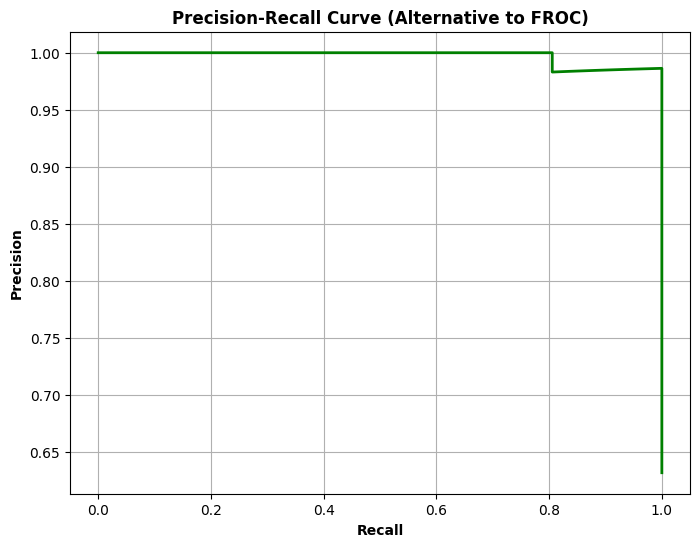

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(recall_vals, precision_vals, color='green', linewidth=2)
plt.xlabel('Recall', fontweight='bold')
plt.ylabel('Precision', fontweight='bold')
plt.title('Precision-Recall Curve (Alternative to FROC)', fontweight='bold')
plt.grid(True)
plt.show()

## References

[1] W.H. Wolberg, W.N. Street, and O.L. Mangasarian, "Breast Cancer Wisconsin
    (Diagnostic) Data Set", UCI Machine Learning Repository, 1995.

[2] M.F. Akay, "Support vector machines combined with feature selection for
    breast cancer diagnosis", Expert Systems with Applications, vol. 36,
    pp. 3240-3247, 2009.

[3] M. Sarkar and T.Y. Leong, "Application of K-nearest neighbors algorithm
    on breast cancer diagnosis problem", Proceedings of the AMIA Symposium,
    pp. 759-763, 2000.

[4] B. Zheng et al., "Breast cancer diagnosis based on feature extraction
    using a hybrid of K-means and support vector machine algorithms",
    Expert Systems with Applications, vol. 41, pp. 1476-1482, 2014.

[5] G.I. Salama, M. Abdelhalim, and M.A. Zeid, "Breast cancer diagnosis on
    three different datasets using multi-classifiers", International Journal
    of Computer and Information Technology, vol. 1, no. 1, pp. 36-43, 2012.